In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv', index_col= 0)
# Index_col mi permette di eliminare il doppione della colonna index evitando problemi con il data cleaning

In [3]:
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


INFO DI BASE

In [4]:
df.shape
# Ottengo dimensione del data frame : righe e colonne

(129971, 13)

In [5]:
df.dtypes
# Ottengo INFO del tipo di dati delle colonne
# Price sono tipo float, points di tipo intero

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
len(df['country'].unique())
# Ottengo cosi quanti paesi presi singolarmente sono presenti nel dataset = 44 paesi

44

In [7]:
df['variety'].unique()
# In questo modo ottengo una lista di tutti i vitigni presenti nel dataset presi singolarmente 

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

In [8]:
len(df['variety'].unique())
# Il totale dei vitigni presenti nel ds, presi singolarmenete è di 708

708

In [9]:
len(df['taster_name'].unique())
# Ottengo il n° di recensori che hanno recensito i vini del dataset = 20 taster

20

In [10]:
df['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

DATA CLEANING & STATISTICHE DI BASE

In [11]:
df.drop_duplicates()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape
# Mi conferma l'eliminazione dei duplicati perchè indica che le righe sono passate da 129.000 circa a 119.000 circa

(119988, 13)

In [14]:
df.isnull().sum()
# Ottengo info riguardo i valori nulli per ogni colonna presente ne df dopo aver eliminato i duplicati.
# Di particolsre interesse è la colonna price con 8395 valori nulli 

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

<Axes: >

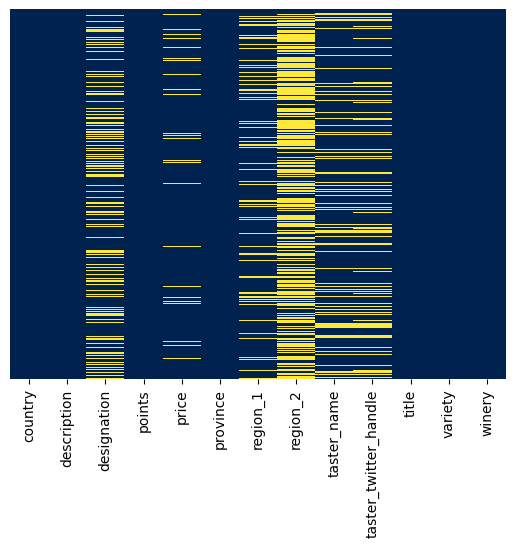

In [15]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='cividis')
# Si possono visualizzare i valori nulli tramite un heatmap che permette di avere una panoramica completa e un intuizione della quantità di valori nulli presenti,
# Tuttavia preferisco avere info tangibili tramite il codice df.isnull().sum()

In [16]:
df[['points','price']].dropna().describe()
# Utilizzo dropna solo sulle colonne interessate altrimenti eliminerebbe troppi dati,
# falsando anche le statistiche d'ordine date da desccribe(), per esempio eliminerebbe il max dal prezzo 3300, in questo modo preservo i valori.

,points,price
count,111593.000000,111593.000000
mean,88.413969,35.620747
std,3.098767,42.103728
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


OUTLIERS

<Axes: xlabel='price'>

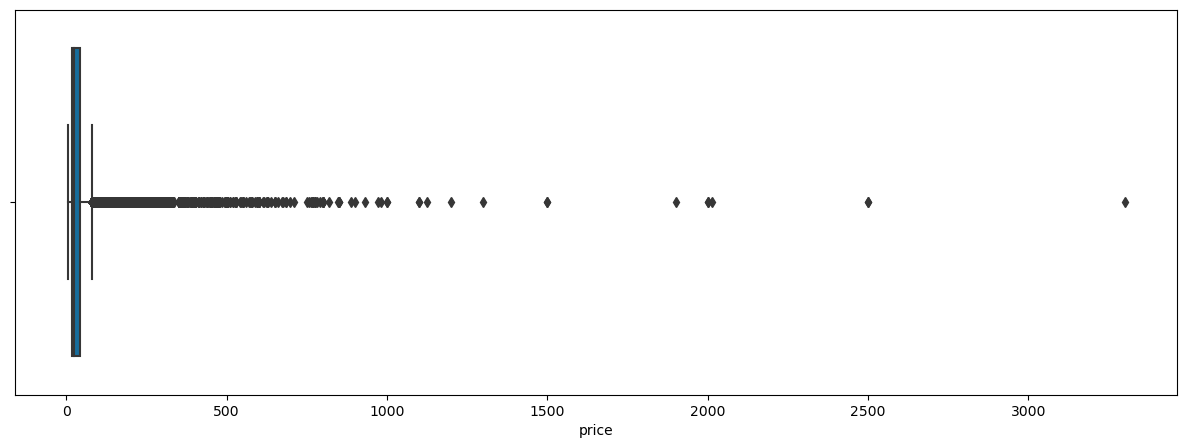

In [17]:
# Verifico la presenza di outliers nella colonna price utilizzando un boxplot
plt.figure(figsize=(15,5))
sns.boxplot(x=df['price'], palette = 'colorblind')
# Ci sono molti outliers, tuttavia eliminarli non avrebbe senso in questo contesto, perchè molti vini superano anche i 300.000$,
# quindi la soluzione migliore sarà semplicemente estrarre i vini, e controllare al momento se il valore è anomalo o no.

In [18]:
# Per esmpio posso controllare il valore anomalo > 3000 utilizzando loc sulla cols price
df.loc[(df['price'] > 3000)]
# Grazie alle mie conoscenze di dominio posso confermare che un Bordeaux della cantina les ormes del 2013 non sarà sicueamente un valore anomalo,
# dato che alcuni vini di questa famosa cantina francese vengono venduti ad oltre 10.000$

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


<Axes: xlabel='points'>

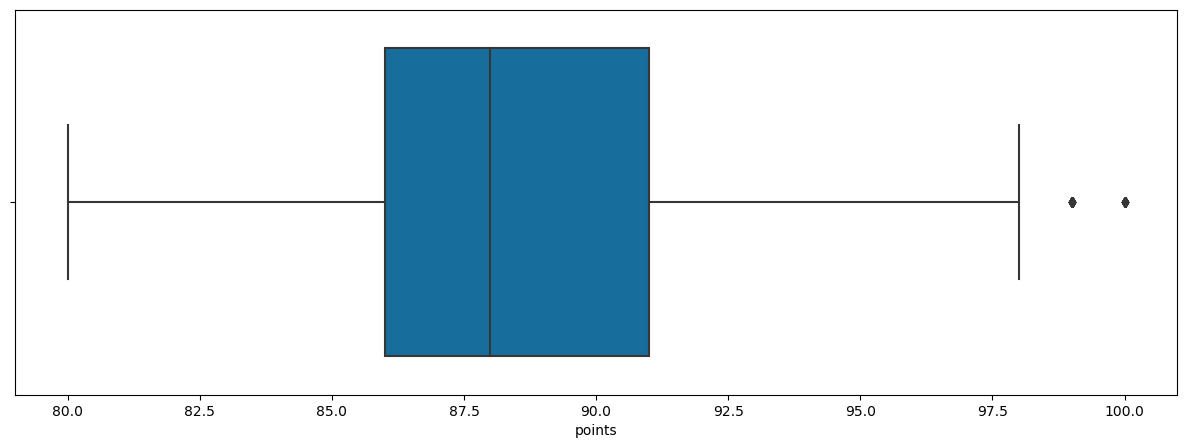

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['points'], palette='colorblind')
# Verifico gli outliers anche per la colonna points utilizzando il boxplot.
# Posso affermare che i 2 valori anomali >97.5non sono da eliminare in quanto i voti vanno da 80 a 100.

VISUALIZZAZIONE E INFO SULLE RECENSIONI

In [20]:
# Dare uno sguardo a quanti vini recensiti ci sono per ogni paese presente nel dataset potrebbe darci alcune info su come è composto il dataset.  
df['country'].value_counts()

# Fatto interessante è che nelle prime 3 posizioni ci sono le top 3 nel mercato del vino a posizioni invertite(italia,US,Francia),
# mentre in ultima posizione ci sono i 3 minori consumatori di vino al mondo con 1 solo vino recensito (Cina,Egitto, Slovacchia).
# Si può affermare con certezza che oltre il 70% dei vini presenti proviene da Francia,Italia e US

US                        50457
France                    20353
Italy                     17940
Spain                      6116
Portugal                   5256
Chile                      4184
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Czech Re

<Axes: title={'center': ' Numbers of wine reviews of top 10 Countries'}>

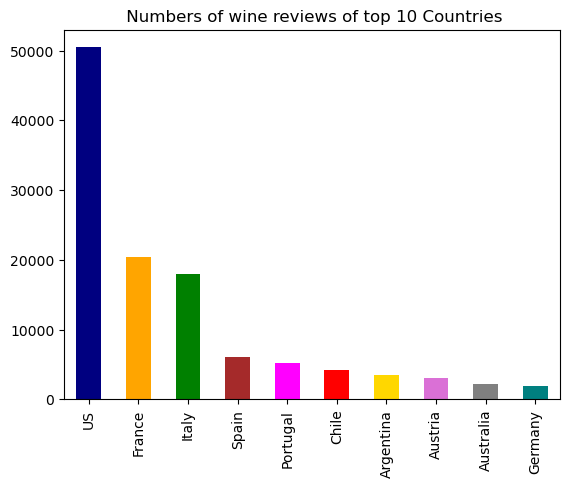

In [21]:
# Opto di mandare a schermo i primi 10 paesi con più vini recensiti tramite un grafico a barre, esso darà una prospettiva migliore della differenza tar US e altri stati.
df['country'].value_counts()[:10].plot(kind = 'bar', color = ('navy','orange','green','brown','magenta','red','gold','orchid','grey','teal','cyan'),title = ' Numbers of wine reviews of top 10 Countries')
# Si nota che gli US danno il distacco notevole alla concorrenza con più di 50.000 vini, tuttavia va contestualizzato dato che il dataset è americano.

VISUALIZZAZIONI E ANALISI SUI PUNTI

C:\Users\mirko\AppData\Local\Temp\ipykernel_8656\1389943066.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val4pgraph = df.groupby(['country']).mean()['points'].sort_values(ascending = False).to_frame()


Text(0, 0.5, 'country')

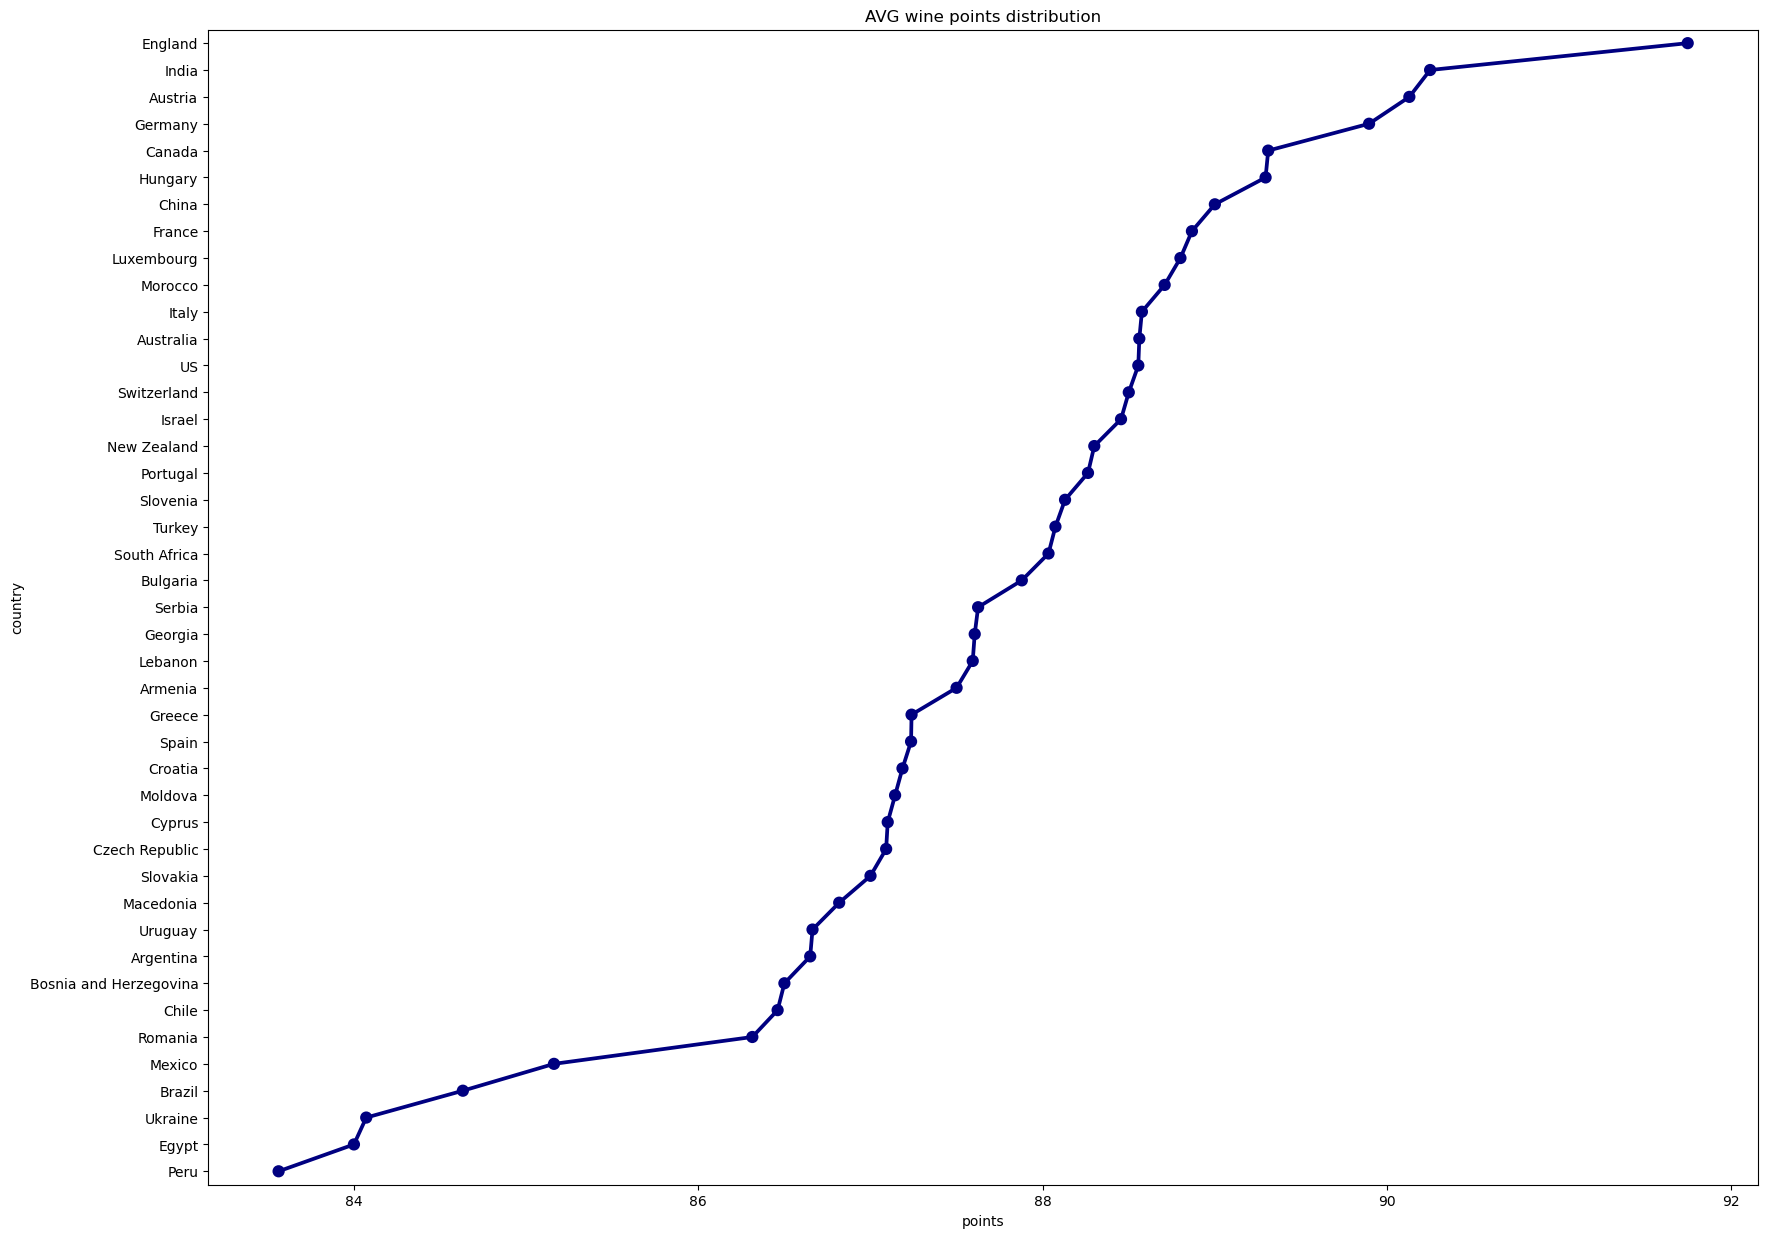

In [22]:
# Osservare la distribuzione della media dei punti tramite grafico può intutivamente essere migliore rispetto ad osservare i valori da una tabella.
val4pgraph = df.groupby(['country']).mean()['points'].sort_values(ascending = False).to_frame()
# raggruppo per country, estraggo la media dei punti e ordino dalla media più alta alla più bassa.
plt.figure(figsize=(20,15))
sns.pointplot(x = val4pgraph['points'], y = val4pgraph.index, color = 'navy', markers = 'o')
plt.title('AVG wine points distribution')
plt.xlabel('points')
plt.ylabel('country')
# Si nota che l'inghilterra guida la distribuzione con distacco netto sulle "inseguitrici"
# seguono India ed Austria con media molto simile e > 90
# Sarebbe interessante esplorare a fondo i vini austriaci dato che probabilmente questi valori elevati nelle colonne : points e price, saranno dati da vini specifici prodotti nelle regioni Burgenland e wachau.

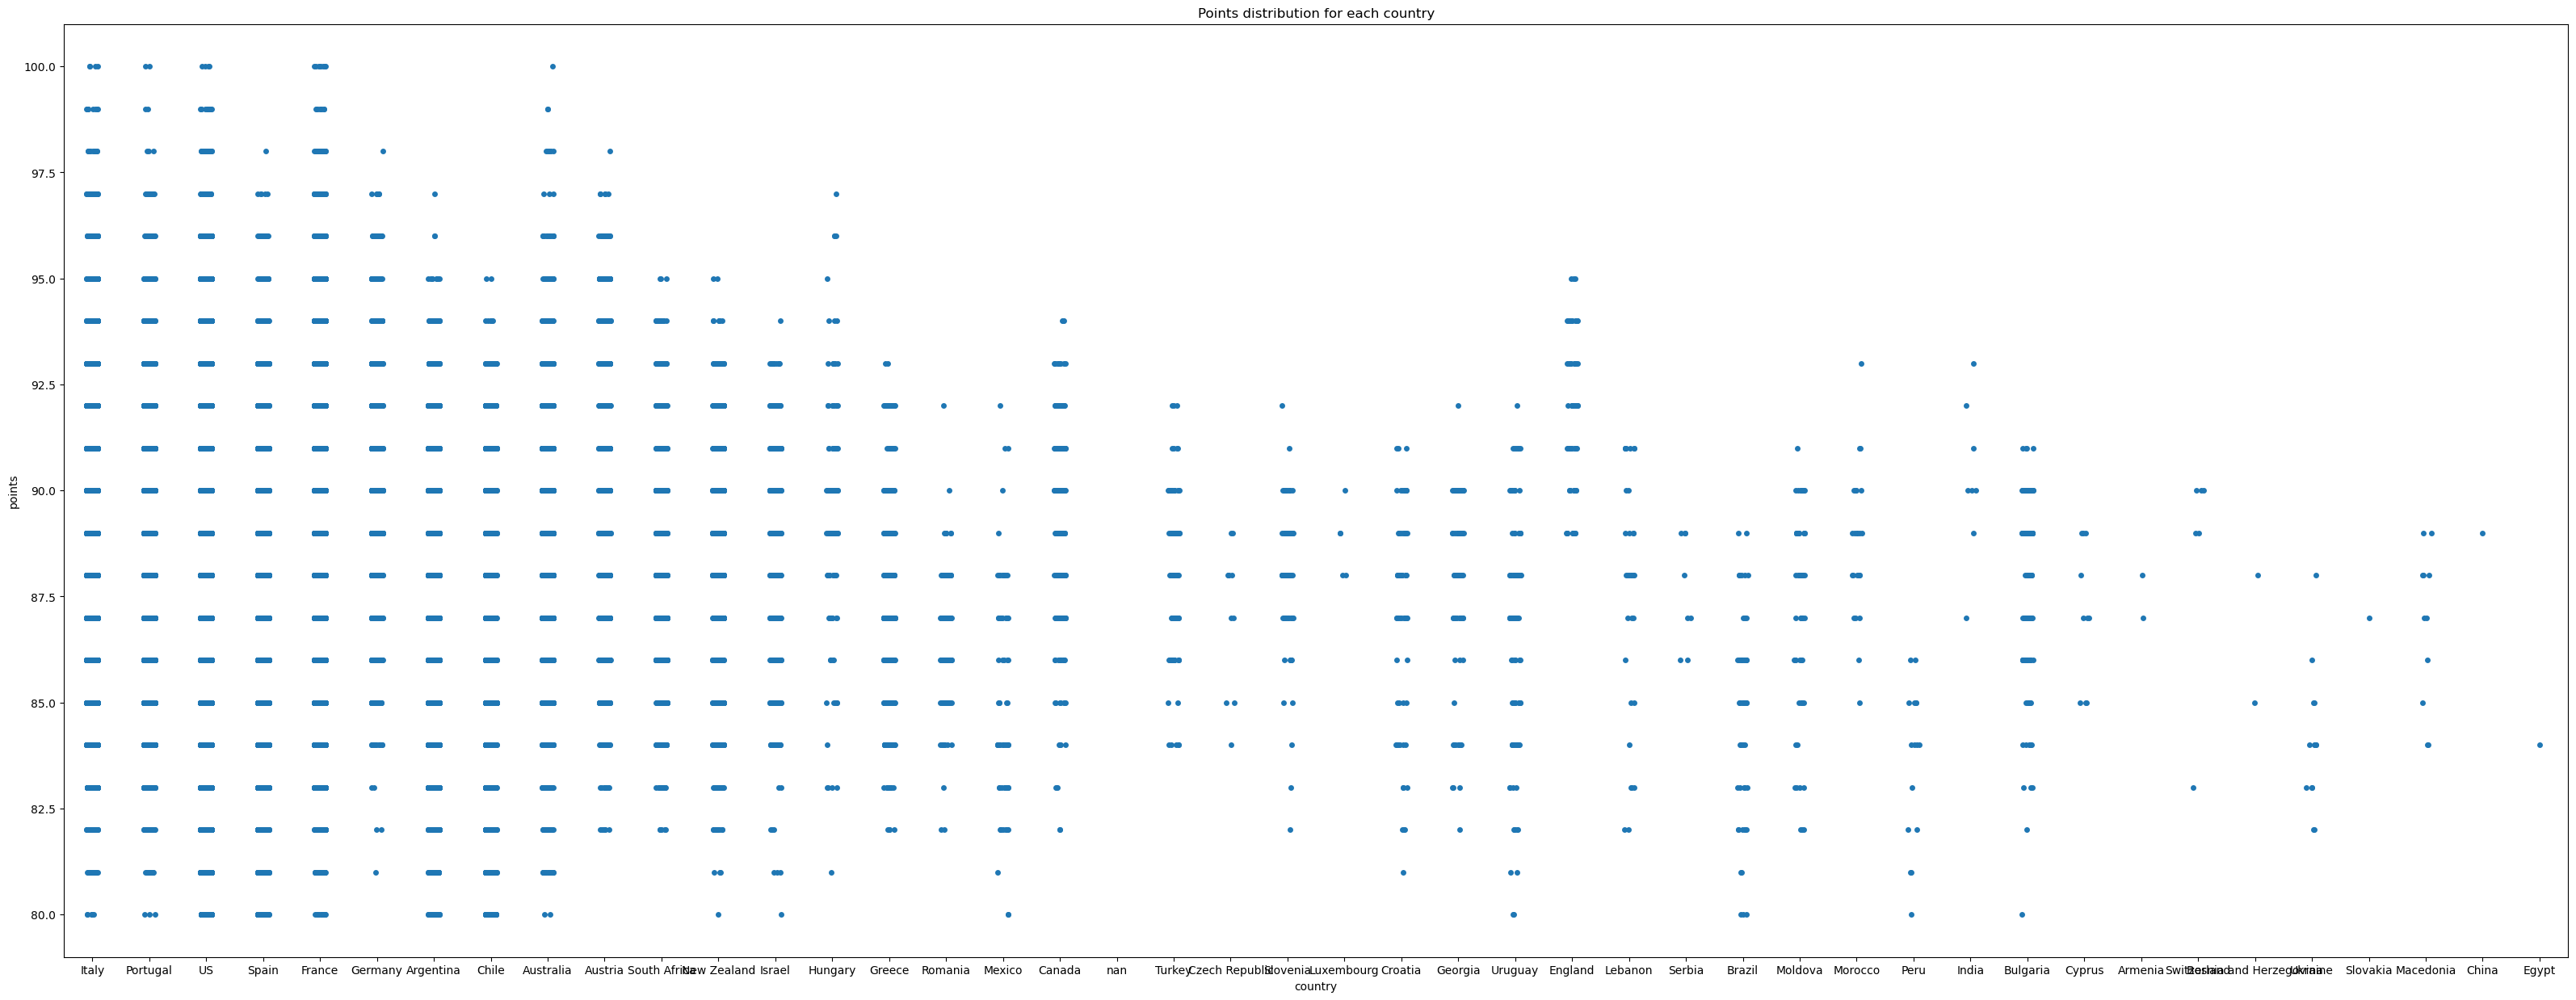

In [23]:
# Tramite uno stripplot si può intuitivamente capire come sono distribuiti i punteggi per ogni paese

plt.figure(figsize = (40,15))
stripplot_points = sns.stripplot(y = 'points', x = 'country', data = df)
stripplot_points.set_title('Points distribution for each country')
plt.show()
# Prendendo ad esempio l'Italia, si nota che i punti sono distribuiti abbastanza uniformemente per ogni punteggio da 80 a 100 ,creando una sorta di barre molto simili tra loro

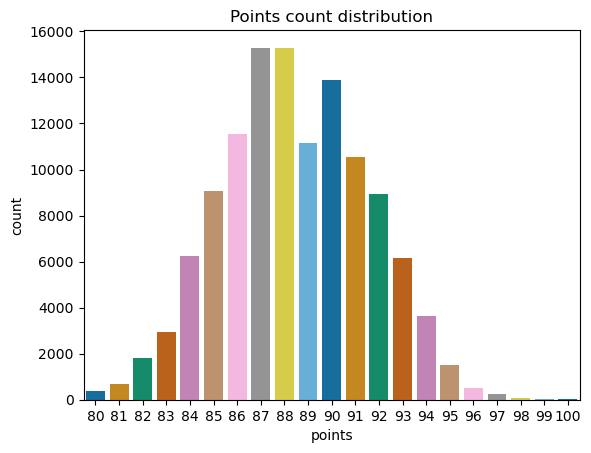

In [24]:
# Fondamentale è visualizzare anche la distribuzione dei punteggi, contando quante volte sono stati assegnati.attraverso un countplot
# Il countplot serve a conoscere la distribuzione
points_count_plot = sns.countplot (x = 'points', data = df, palette = 'colorblind')
points_count_plot.set_title('Points count distribution')
points_count_plot.set_xlabel('points')
points_count_plot.set_ylabel('count')
plt.show()

# Si nota che è una distribuzione normale, con media 88 e std 3 si può affermare he il 98% dei valori è compreso tra 82 points e 95 points.

In [25]:
# Provo a verificare ciò che ho affermato riguardo l'Austria e la presenza di vini esclusivi prodotti nelle regioni Burgenland e Wachau.
df_austria = df[(df['country'] == 'Austria')]
# Per rendere più semplice la verifica creo un nuovo dataframe attraverso un filtro sulla colonna country = Austria
# In questo modo ho un unico dataframe con tutti i vini recensiti dell'Austria

In [26]:
# Estraggo il n° totale di vini proveniente da ogni regione austriaca
df_austria['province'].value_counts()
# Si nota che le due regioni nominate precedentemente presentano 607 vini (Burgenland) e 329 vini (Wachau)

Burgenland                   607
Niederösterreich             540
Kamptal                      371
Wachau                       329
Kremstal                     306
Thermenregion                112
Südsteiermark                101
Carnuntum                     91
Weinviertel                   90
Vienna                        66
Österreichischer Sekt         63
Wagram                        61
Wagram-Donauland              52
Leithaberg                    37
Traisental                    37
Südoststeiermark              34
Austria                       26
Wiener Gemischter Satz        23
Mittelburgenland              22
Steiermark                    18
Weinland Österreich           16
Eisenberg                     15
Neusiedlersee                 11
Österreichischer Perlwein      4
Südburgenland                  2
Name: province, dtype: int64

In [27]:
# Allostesso modo aggiungendo sum() ne estraggo il conteggio totale
df_austria['province'].value_counts().sum()
# Ottengo l'info che ci sono ben 3034 vini proveninti dall'Austri
# (Ho voluto mostrare che so estrrre tramite codice anche se bastava andare a rivedere i grafici e le estrazioni precedenti)

3034

In [28]:
# Per prima cosa posso estrre una tabella completa di tutti i vini Austriaci della regione Burgenland con punteggio >89 utilizzando i filtri sul df
df_austria[(df_austria['points'] > 89) & (df_austria['province'] == 'Burgenland')]
# Ottengo così una tabella da cui attingere di tutti vini in questione, da cui si evince che ben 309 vini hanno un punteggio > di 89
# Inoltre tramite un semplice calcolo saprò che il 10,1% dei vini di questa regione con points > 89 compongono il df ed influenzano la valutazione.

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
690,Austria,"Still closed, this is redolent of the elegant,...",Nit'ana,91,35.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Nittnaus Hans und Christine 2013 Nit'ana Red (...,Red Blend,Nittnaus Hans und Christine
1422,Austria,"Alluring white-pepper spice, with nuances of d...",Reserve,93,NaN,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Krutzler 2011 Reserve Blaufränkisch (Burgenland),Blaufränkisch,Krutzler
1442,Austria,Brooding flavors of dark cherry and pure cocoa...,Pannobile,92,60.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Judith Beck 2011 Pannobile Red (Burgenland),Austrian Red Blend,Judith Beck
2048,Austria,"From slate and limestone vineyards, this is an...",Tatschler,92,NaN,Burgenland,NaN,NaN,Roger Voss,@vossroger,Kollwentz 2008 Tatschler Chardonnay (Burgenland),Chardonnay,Kollwentz
2665,Austria,"Dry spice is fighting with rich, smooth Chardo...",Beerenauslese,90,NaN,Burgenland,NaN,NaN,Roger Voss,@vossroger,Umathum 2011 Beerenauslese White (Burgenland),Austrian white blend,Umathum
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126043,Austria,"Dark, brooding blueberry scents permeate this ...",Königsberg,92,22.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Uwe Schiefer 2014 Königsberg Blaufränkisch (Bu...,Blaufränkisch,Uwe Schiefer
128722,Austria,Crushed boysenberry is foremost on the nose an...,Goldberg,90,NaN,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Birgit Braunstein 2011 Goldberg Zweigelt (Burg...,Zweigelt,Birgit Braunstein
129254,Austria,An almost minty lift puts a very different spi...,Goldberg Alte Reben,93,44.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Johann Heinrich 2011 Goldberg Alte Reben Blauf...,Blaufränkisch,Johann Heinrich
129550,Austria,"The nose is still shy and closed. Likewise, th...",Johanneshöhe,93,20.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Prieler 2015 Johanneshöhe Blaufränkisch (Burge...,Blaufränkisch,Prieler


In [29]:
# Per curiosità ed interesse, penso che sarebbe utile ai fini di una selezione per il marketplace, verificare la presenza di un eccelenza austriaca : il Ruster Ausbruch e se ha un punteggio > 95
df_austria.loc[(df_austria['title'].str.contains('Ruster Ausbruch')) & (df_austria['points'] > 95)]
# Ottengo che è presente un Ruster Ausbruch di una delle cantine più rinomate in austria e al mondo : Heidi Schröck, un punteggio di 96 e un prezzo sorprendentemente "basso" di 160$.

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
119660,Austria,"On the nose, a blast of beeswax and honey prov...",Ruster Ausbruch Turner,96,160.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Heidi Schröck 2014 Ruster Ausbruch Turner Whit...,White Blend,Heidi Schröck


In [30]:
# Eseguo la stessa verifica anche per la regione Wachau
df[(df['country'] == 'Austria') & (df['points'] >89) & (df['province'] == 'Wachau')]
# Si puo notare che l' 8.6% dei vini provenienti da wachau ha ricevuto una valutaziione > 89 (261/3034 = 0.086  = 8.6% )

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1341,Austria,Fresh Conference pear notes abound on the nose...,Terrassen Federspiel,90,20.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Domäne Wachau 2016 Terrassen Federspiel Grüner...,Grüner Veltliner,Domäne Wachau
1438,Austria,"A hint of mossy undergrowth leads on the nose,...",Achleiten Smaragd,92,46.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Domäne Wachau 2012 Achleiten Smaragd Grüner Ve...,Grüner Veltliner,Domäne Wachau
2170,Austria,The restrained nose just gives a glimpse of le...,Ried am Zaum Hefeabzug,90,25.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Malat 2016 Ried am Zaum Hefeabzug Pinot Blanc ...,Pinot Blanc,Malat
2586,Austria,"This is a crisp, but also rich style of Feders...",Loibner Klostersatz Federspiel,90,NaN,Wachau,NaN,NaN,Roger Voss,@vossroger,F X Pichler 2012 Loibner Klostersatz Federspie...,Grüner Veltliner,F X Pichler
3538,Austria,Yellow fruits lead off this sophisticated wine...,Terrassen Smaragd,92,30.0,Wachau,NaN,NaN,Roger Voss,@vossroger,Domäne Wachau 2012 Terrassen Smaragd Riesling ...,Riesling,Domäne Wachau
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124601,Austria,A very focused wine with a core of strong stru...,Singerriedel Smaragd,92,40.0,Wachau,NaN,NaN,Roger Voss,@vossroger,Gritsch Mauritiushof 2009 Singerriedel Smaragd...,Grüner Veltliner,Gritsch Mauritiushof
125462,Austria,Restrained but earthy notes of lemon zest play...,Ried Kirnberg Smaragd,93,27.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Fischer 2013 Ried Kirnberg Smaragd Riesling (W...,Riesling,Fischer
125470,Austria,"Hints of woodruff, green pear and grapefruit z...",Pich Point Smaragd,93,40.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Schmelz 2013 Pich Point Smaragd Grüner Veltlin...,Grüner Veltliner,Schmelz
129237,Austria,The slightest hints of mirabelle plum and peac...,Kellerberg Smaragd,93,49.0,Wachau,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Domäne Wachau 2014 Kellerberg Smaragd Grüner V...,Grüner Veltliner,Domäne Wachau


VISUALIZZAZIONI E ANALISI SUI PREZZI

C:\Users\mirko\AppData\Local\Temp\ipykernel_8656\2742674794.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val4graph = df.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()


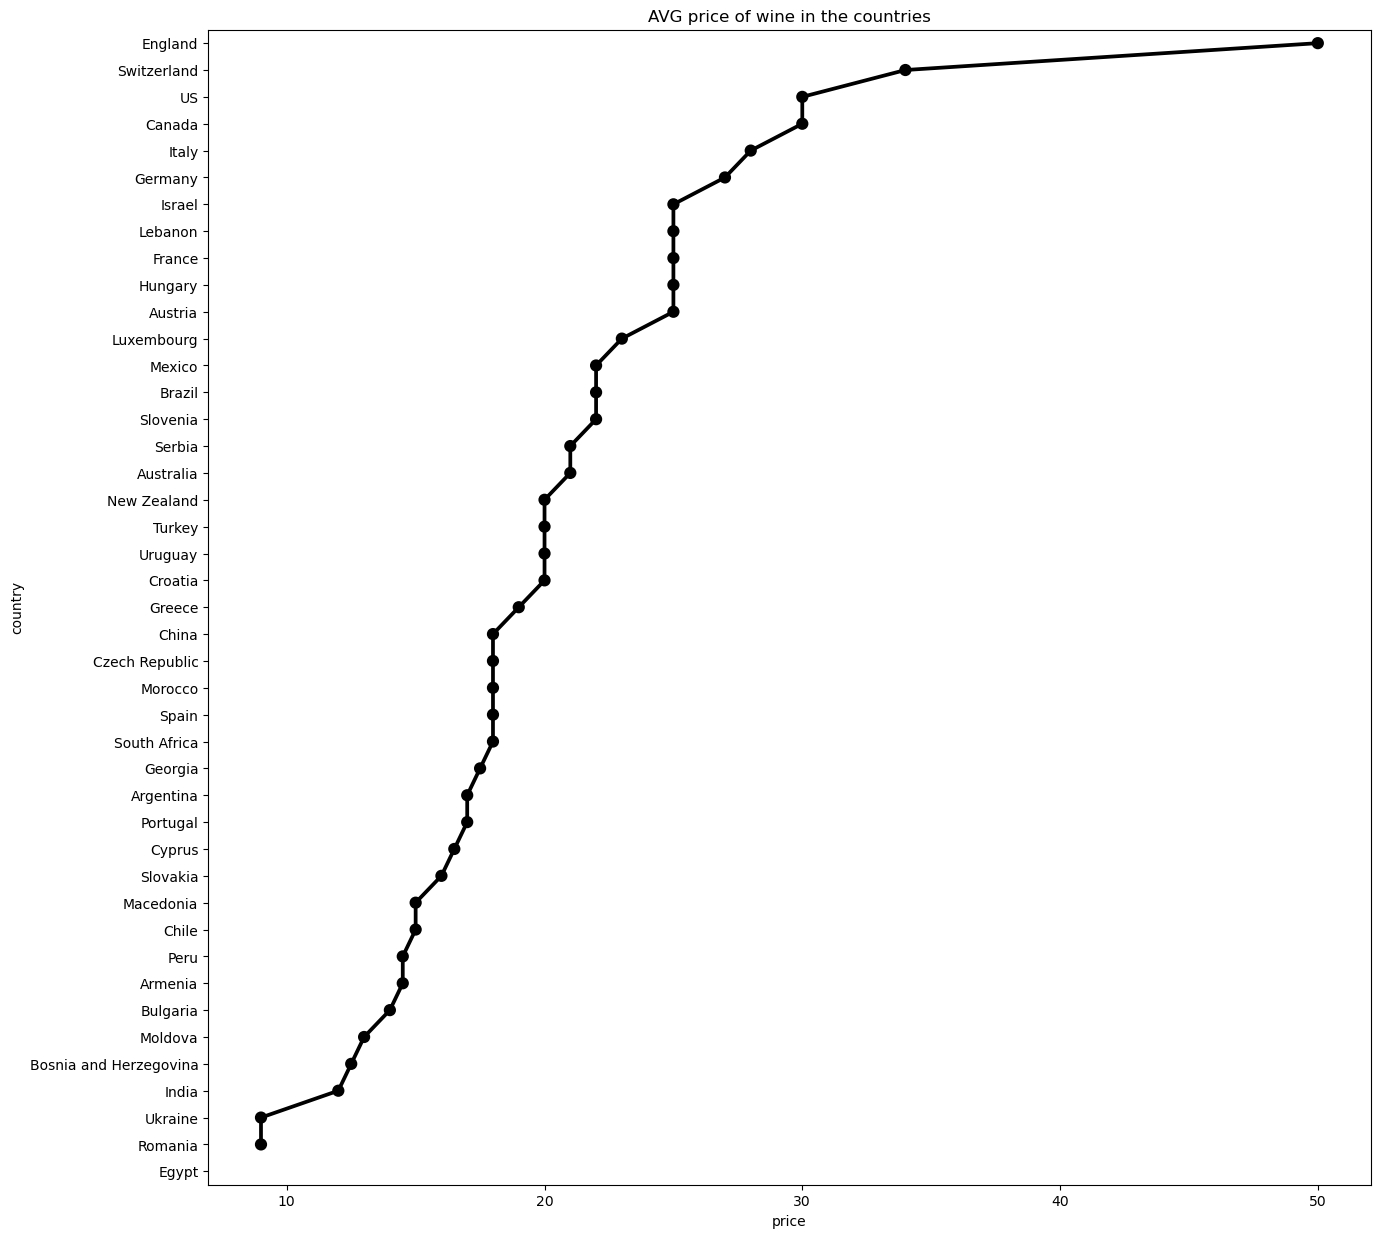

In [31]:
# Proseguo le visualizzazioni e le analisi.
# Ai fini di decisioni data driven sarebbe utile sapere la distribuzione dei prezzi medi.
# Trmite un grafico ben strutturato con seaborn posso visualizzare la distribuzione dei prezzi medi per ogni paese.
val4graph = df.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()
# Raggruppo per paesi, estraggo la mediana dalla colonna prezzi ed ordino dal valore più alto al più basso
plt.figure(figsize=(15,15))
# Utilizzo ,15 perchè mi permette di distanziare i punti del grafico e i nomi dei paesi
sns.pointplot(x = val4graph['price'], y = val4graph.index, color ='black', markers = 'o')
plt.title('AVG price of wine in the countries')
plt.xlabel('price')
plt.ylabel('country') ;
# Mando a schermo il grafico : sull asse x verrà indicato il prezzo e sull asse y i paesi.
# Per descrivere la tendenza centrale di un gruppo, ho scelto la mediana perchè più indicata della media aritmetica.
# In questo caso è più corretto la mediana perchè il gruppo contiene n oggetti con valori molto alti che causano una media ben al di sopra della tendenza centrale(asimmetria).
# Con questo grafico si ottiene una panoramica completa dei prezzi medi per ogni paese e osservanre la distribuzione.
# Nelle prime 3 posizioni :
# 1) England (questa è una sorpresa in quanto solitamente i vini inglesi non sono particolarmente rinomati e costosi)
# 2) Switzerland 
# 3) US

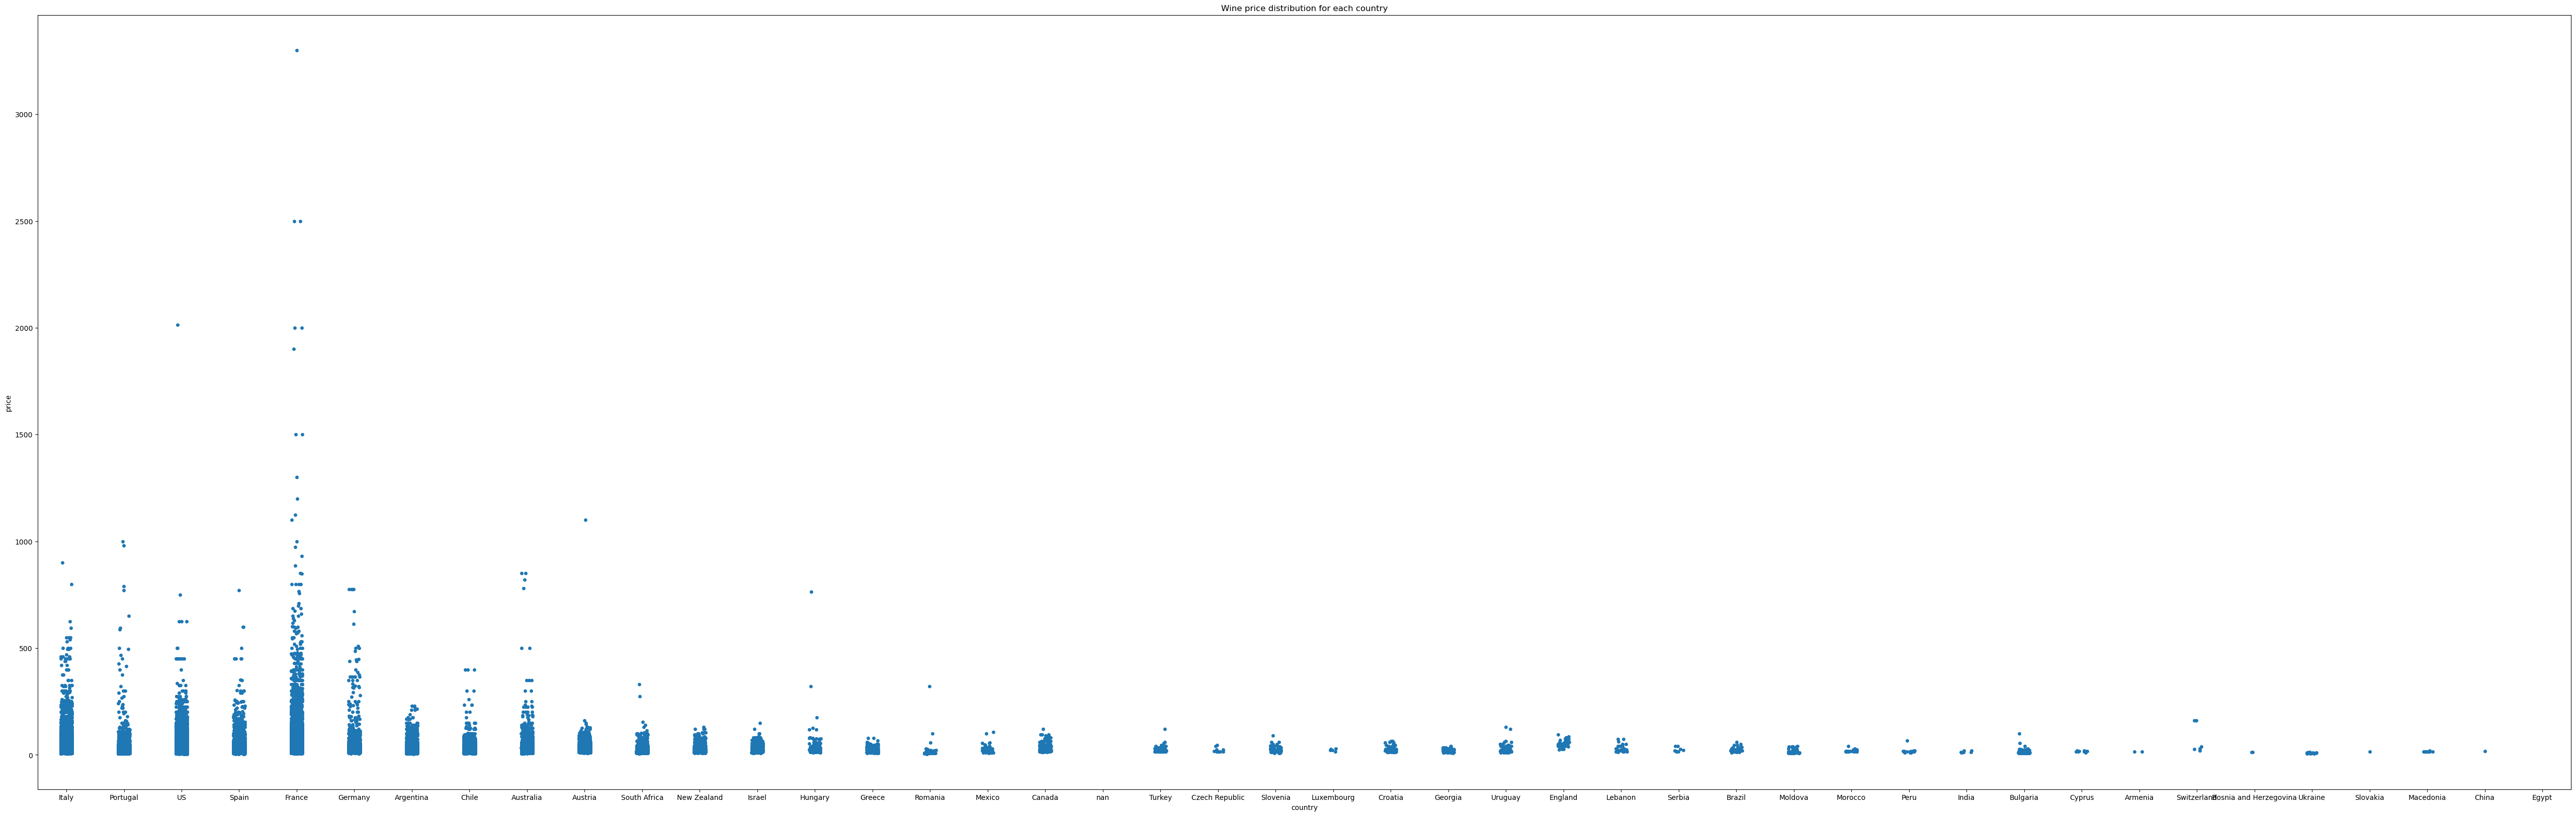

In [32]:
# Nel contesto dei prezzi è utile visualizzare tramite un grafico la distribuzione del prezzo dei vini, in questo modo si potrà avere un idea chiara su quali paesi presenti nel dataset hanno i vini più costosi.
plt.figure(figsize=(65,20))
g2 = sns.stripplot(y='price', x= 'country', data = df, marker='o')
g2.set_title('Wine price distribution for each country')
plt.show()
# Si intuisce con un rapido sgurdo al grafico e la posizione dei punti, che la Francia è il paese con i vini più costosi presenti nel ds.
# Questo grafico non deve però trarre in inganno, perchè non indica il paese con i prezzi dei vini più alti.

In [33]:
# Volendo verificare quali vini vengono visualizzati nello stripplot precedente sopra i 2000$, 
# si utilizza la funzione loc con un filtro price >= 2000 che prenderà in considerazione tutti i paesi.
df.loc[(df['price'] >= 2000 )]
# Ci restituisce che 5 vini su 6 provengono dalla Francia, di cui 3 da vitigno Bordeaux (di cui 2 sono il famosissimo Pétrus) e 2 pinot noir.
# L'altro vino proviene dagli USA ed è uno chardonnay della cantina Blair.

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


In [34]:
# Può essere interessante avere un idea dei prezzi totali per paese, basterà utilizzare groupby per ogni paese e sommare i prezzi
df.groupby(['country'])['price'].sum().sort_values(ascending=False)[:10]
# Si ottiene così un elenco dei 10 paesi con la loro rispettiva somma dei prezzi 
# Si nota che la Francia nonostante abbia vini a prezzi estremamente più alti, è in seconda posizione con un totale di 683.916$.
# Top 3 :
# 1) US totale = 1.843.610$
# 2) Francia totale = 683.916$
# 3) Italia totale = 619.128$

country
US           1843610.0
France        683916.0
Italy         619128.0
Spain         170616.0
Portugal      119547.0
Chile          86103.0
Argentina      86038.0
Germany        84792.0
Austria        79470.0
Australia      77404.0
Name: price, dtype: float64

Text(0.5, 0, '')

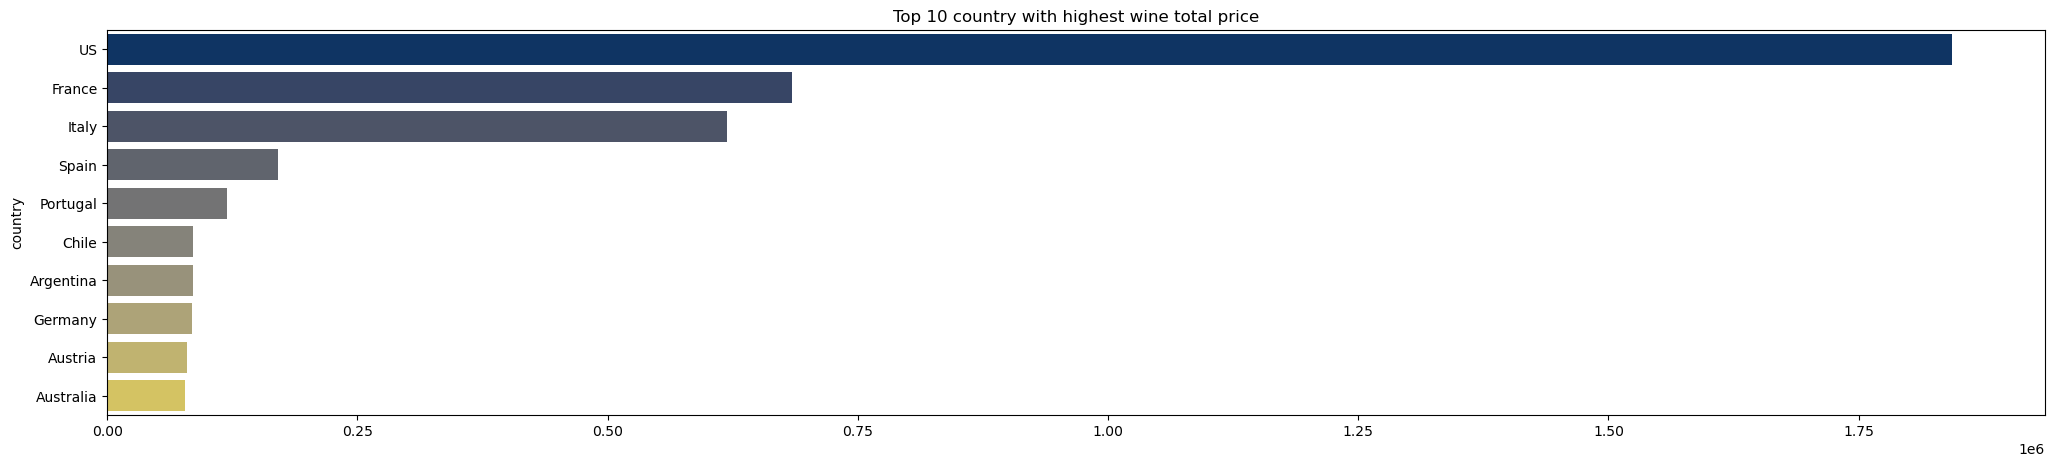

In [35]:
# Rendo più intuitivi i valori grazie a un grafico, in questo modo apparirà più chiara la distribuzione
plt.figure(figsize=(25,5))

val4graph2 = df.groupby(['country'])['price'].sum().sort_values(ascending=False).to_frame()[:10]
g3 = sns.barplot(x= val4graph2['price'], y = val4graph2.index, palette = 'cividis')
g3.set_title('Top 10 country with highest wine total price')
g3.set_ylabel('country')
g3.set_xlabel('')

# A livello visivo, il grafico mi permette di notare lo stacco netto della top 3 dagli altri paesi
# La Spagna è in 4 posizione di poco superiore al Portogallo
# Cile, Argentina, Germania, Austria e Australia sono invece pressochè alla pari.

Text(0.5, 0, '')

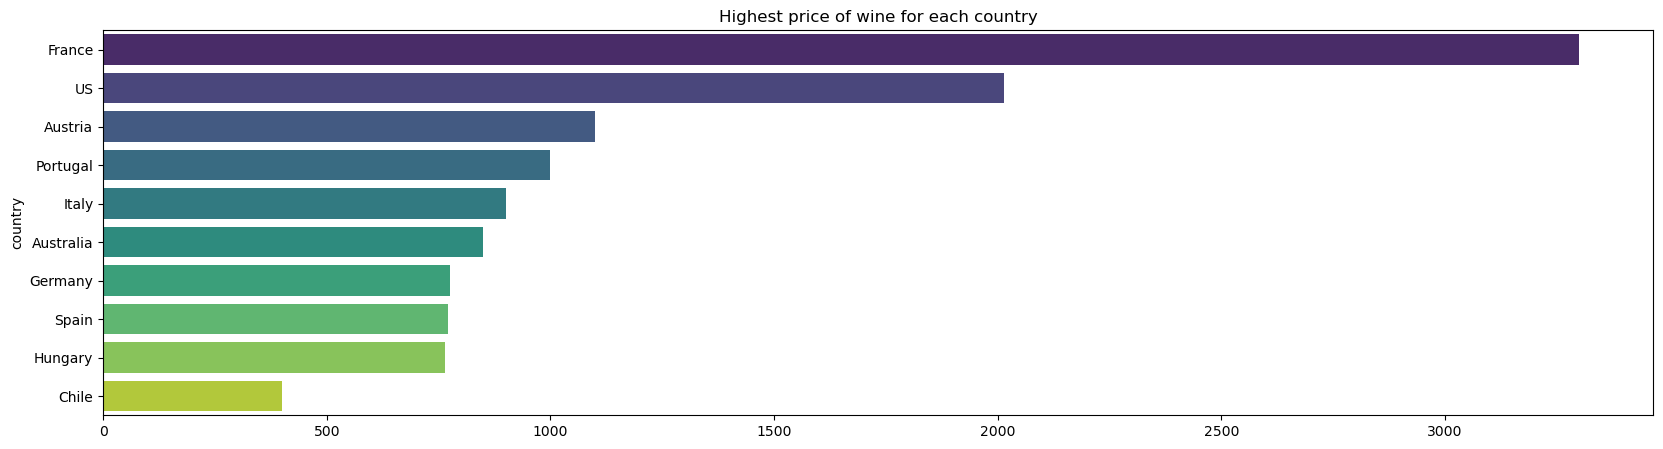

In [36]:
# Un importante ed interessante valutazione potrebbe essere visualizzare tramite un grafico il prezzo più alto associato a un vino prodotto in un paese. 
plt.figure(figsize=(20,5))

val4graph3 = df.groupby(['country'])['price'].max().sort_values(ascending = False).to_frame()[:10]
g4 = sns.barplot(x = val4graph3['price'], y = val4graph3.index, palette = 'viridis')
g4.set_title('Highest price of wine for each country')
g4.set_ylabel('country')
g4.set_xlabel('')

# Visivamente si nota che nella top 10, 9 paesi su 10 hanno prodotto almeno un vino ad un prezzo >500, eccetto il Cile.
# Saprò che il vino più costoso presente nel dataset prodotto in Francia avrà un prezzo > 3000, per gli US sarà > 2000, etc..

In [37]:
# Potrebbe essere più utile sapere qual'è di preciso il prezzo più alto di un vino prodotto in paese, il grafico precedente dava un intuizione mentre i valori invece andranno estratti.
df.groupby(['country'])['price'].max().sort_values(ascending = False)[:10]
# Tramite questo codice che va ad estarre il prezzo massimo associato a un singolo vino prodotto in ogni paese presente nel ds.
# I valori che potrebbero suscitare curiosità (a parte i soliti noti) sono :
# 1) l'Italia in 5a posizione, nonostante sia il secondo paese con i vini più costosi al mondo, nel dataset è presente con un vino di "soli" 900$
# 2) la Germania in 7a posizione, malgrado un clima non propriamente favorevole a produrre vini costosi e rinomati, è presente con un rispettabile vino da 775$
# 3) L'Ungheria in 9a posizione,stesso discorso come per la germania, tuttavia sospetto sia presente nel dataset con il Tokaji che è uno dei midgliori vini dessert al mondo.

country
France       3300.0
US           2013.0
Austria      1100.0
Portugal     1000.0
Italy         900.0
Australia     850.0
Germany       775.0
Spain         770.0
Hungary       764.0
Chile         400.0
Name: price, dtype: float64

In [38]:
# Verifico ciò che ho affermato precedentemente riguardo l'Ungheria e il vino Tokaji  tramite l'utilizzo di filtri sulle colonne country-price e l'utilizzo dell'operatore "&"
df[(df['country'] == 'Hungary') & (df['price'] >=700)]
# La supposizione era corretta, è un tokaji della rinomata cantina royal tokaji

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
49326,Hungary,"Surprisingly subtle, yet maddeningly complex, ...",Essencia,94,764.0,Tokaji,NaN,NaN,Anna Lee C. Iijima,NaN,Royal Tokaji 2003 Essencia (Tokaji),Furmint,Royal Tokaji


In [39]:
# Con la funzione loc ed immettendo l'indice nella parentesi estraggo tutte le info utili relative al vino tokaji in questione.
df.loc[49326]
# Info : Prodotto in Ungheria dalla cantina Royal Tokaji utilizzando il vitigno furmint, si chiama essencia ed è stato recensito da Anna Lee C. Iijima.

country                                                            Hungary
description              Surprisingly subtle, yet maddeningly complex, ...
designation                                                       Essencia
points                                                                  94
price                                                                764.0
province                                                            Tokaji
region_1                                                               NaN
region_2                                                               NaN
taster_name                                             Anna Lee C. Iijima
taster_twitter_handle                                                  NaN
title                                 Royal Tokaji 2003 Essencia  (Tokaji)
variety                                                            Furmint
winery                                                        Royal Tokaji
Name: 49326, dtype: objec

VISUALIZZAZIONI E ANALISI SUI VIGNETI

In [40]:
# Cosa si può dire riguardo il tipo di vigneti?
# Per prima cosa sarebbe utile capire quali sono stati i vigneti più recensiti
df['variety'].value_counts()[:20]
# Estraggo le seguenti info che indicano numericamente quante recensioni ha ottenuto ogni vigneto preso singolarmente.
# utilizzando le [] restringo il campo ai primi 20 vigneti.
# Il più recensito è il pinot nero con 12.278 recensioni, seggito dallo chardonnay con 10868 e dal cabernet sauvignon con 8840
# Fanalini di coda della top 20 : il tempranillo con 1671 recensioni, un miscela non specificata di uva rossa della valle del rodano con 1343 recensioni, e il pinot grigio con 1324.

Pinot Noir                  12278
Chardonnay                  10868
Cabernet Sauvignon           8840
Red Blend                    8243
Bordeaux-style Red Blend     6471
Riesling                     4773
Sauvignon Blanc              4575
Syrah                        3828
Rosé                         3220
Merlot                       2896
Nebbiolo                     2607
Zinfandel                    2530
Sangiovese                   2462
Malbec                       2446
Portuguese Red               2282
White Blend                  2179
Sparkling Blend              1971
Tempranillo                  1671
Rhône-style Red Blend        1343
Pinot Gris                   1324
Name: variety, dtype: int64

Text(0.5, 1.0, 'Distribution of top 20 vineyards most reviews')

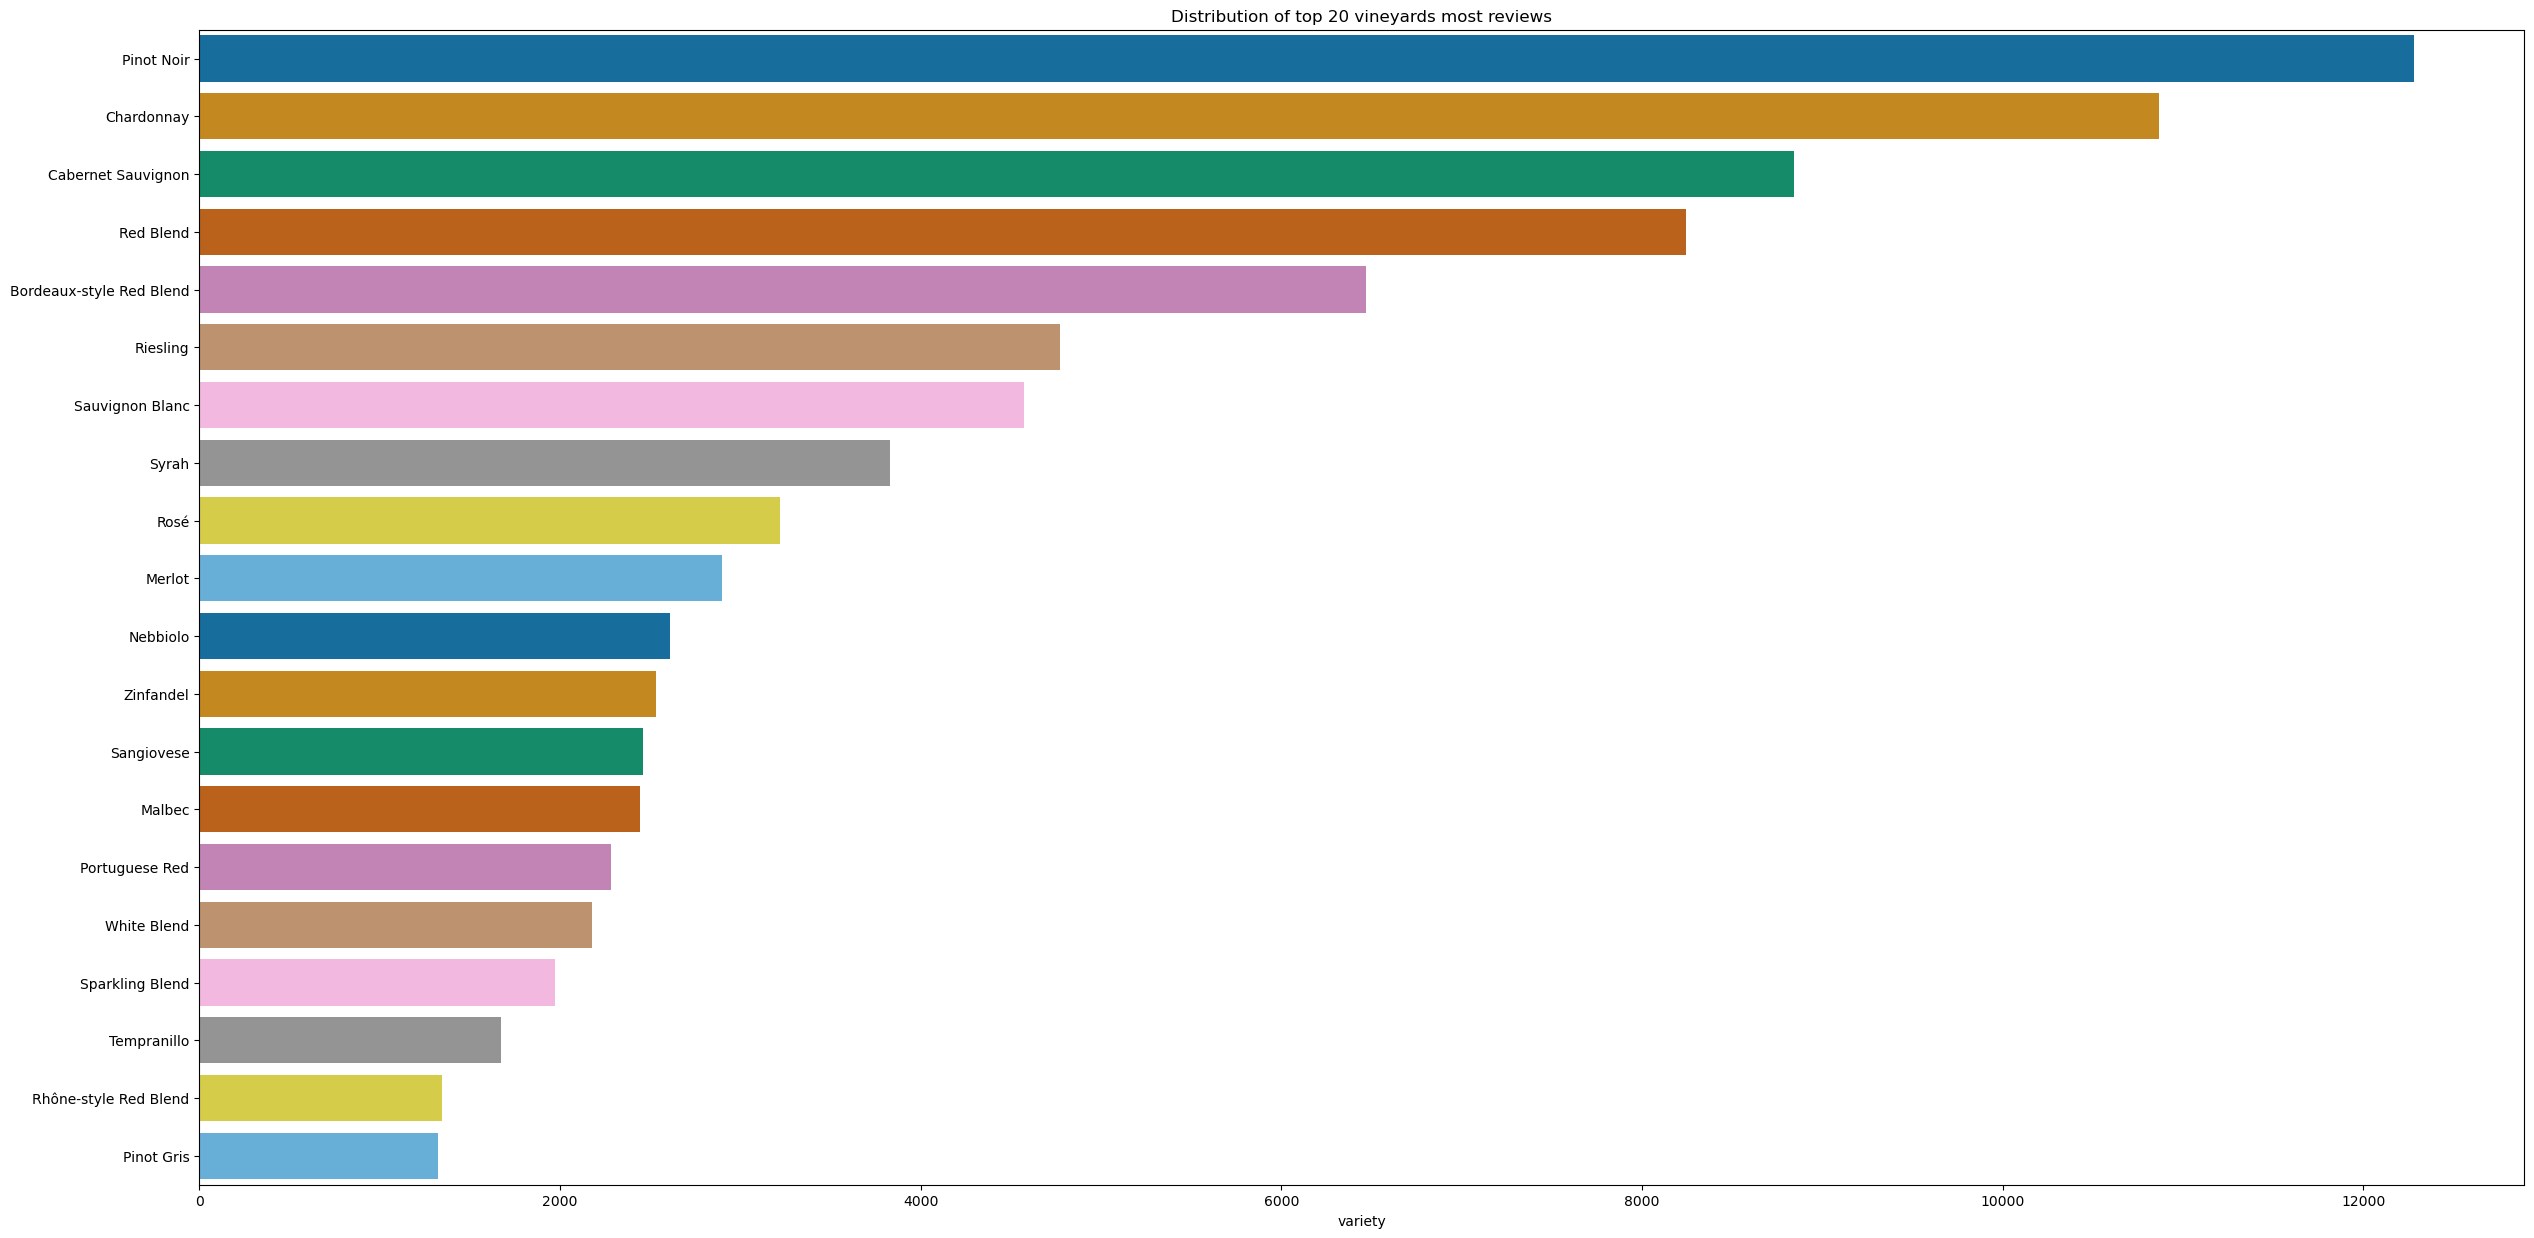

In [41]:
# Tramite un grafico rendo più intuitiva ed immediata la visulaizzazione della distribuzione delle recensioni 
plt.figure(figsize=(30,15))
reviews_graph = df['variety'].value_counts().to_frame()[:20]
sns.barplot( x = reviews_graph['variety'], y = reviews_graph.index, data = reviews_graph, palette = 'colorblind')
plt.title('Distribution of top 20 vineyards most reviews')

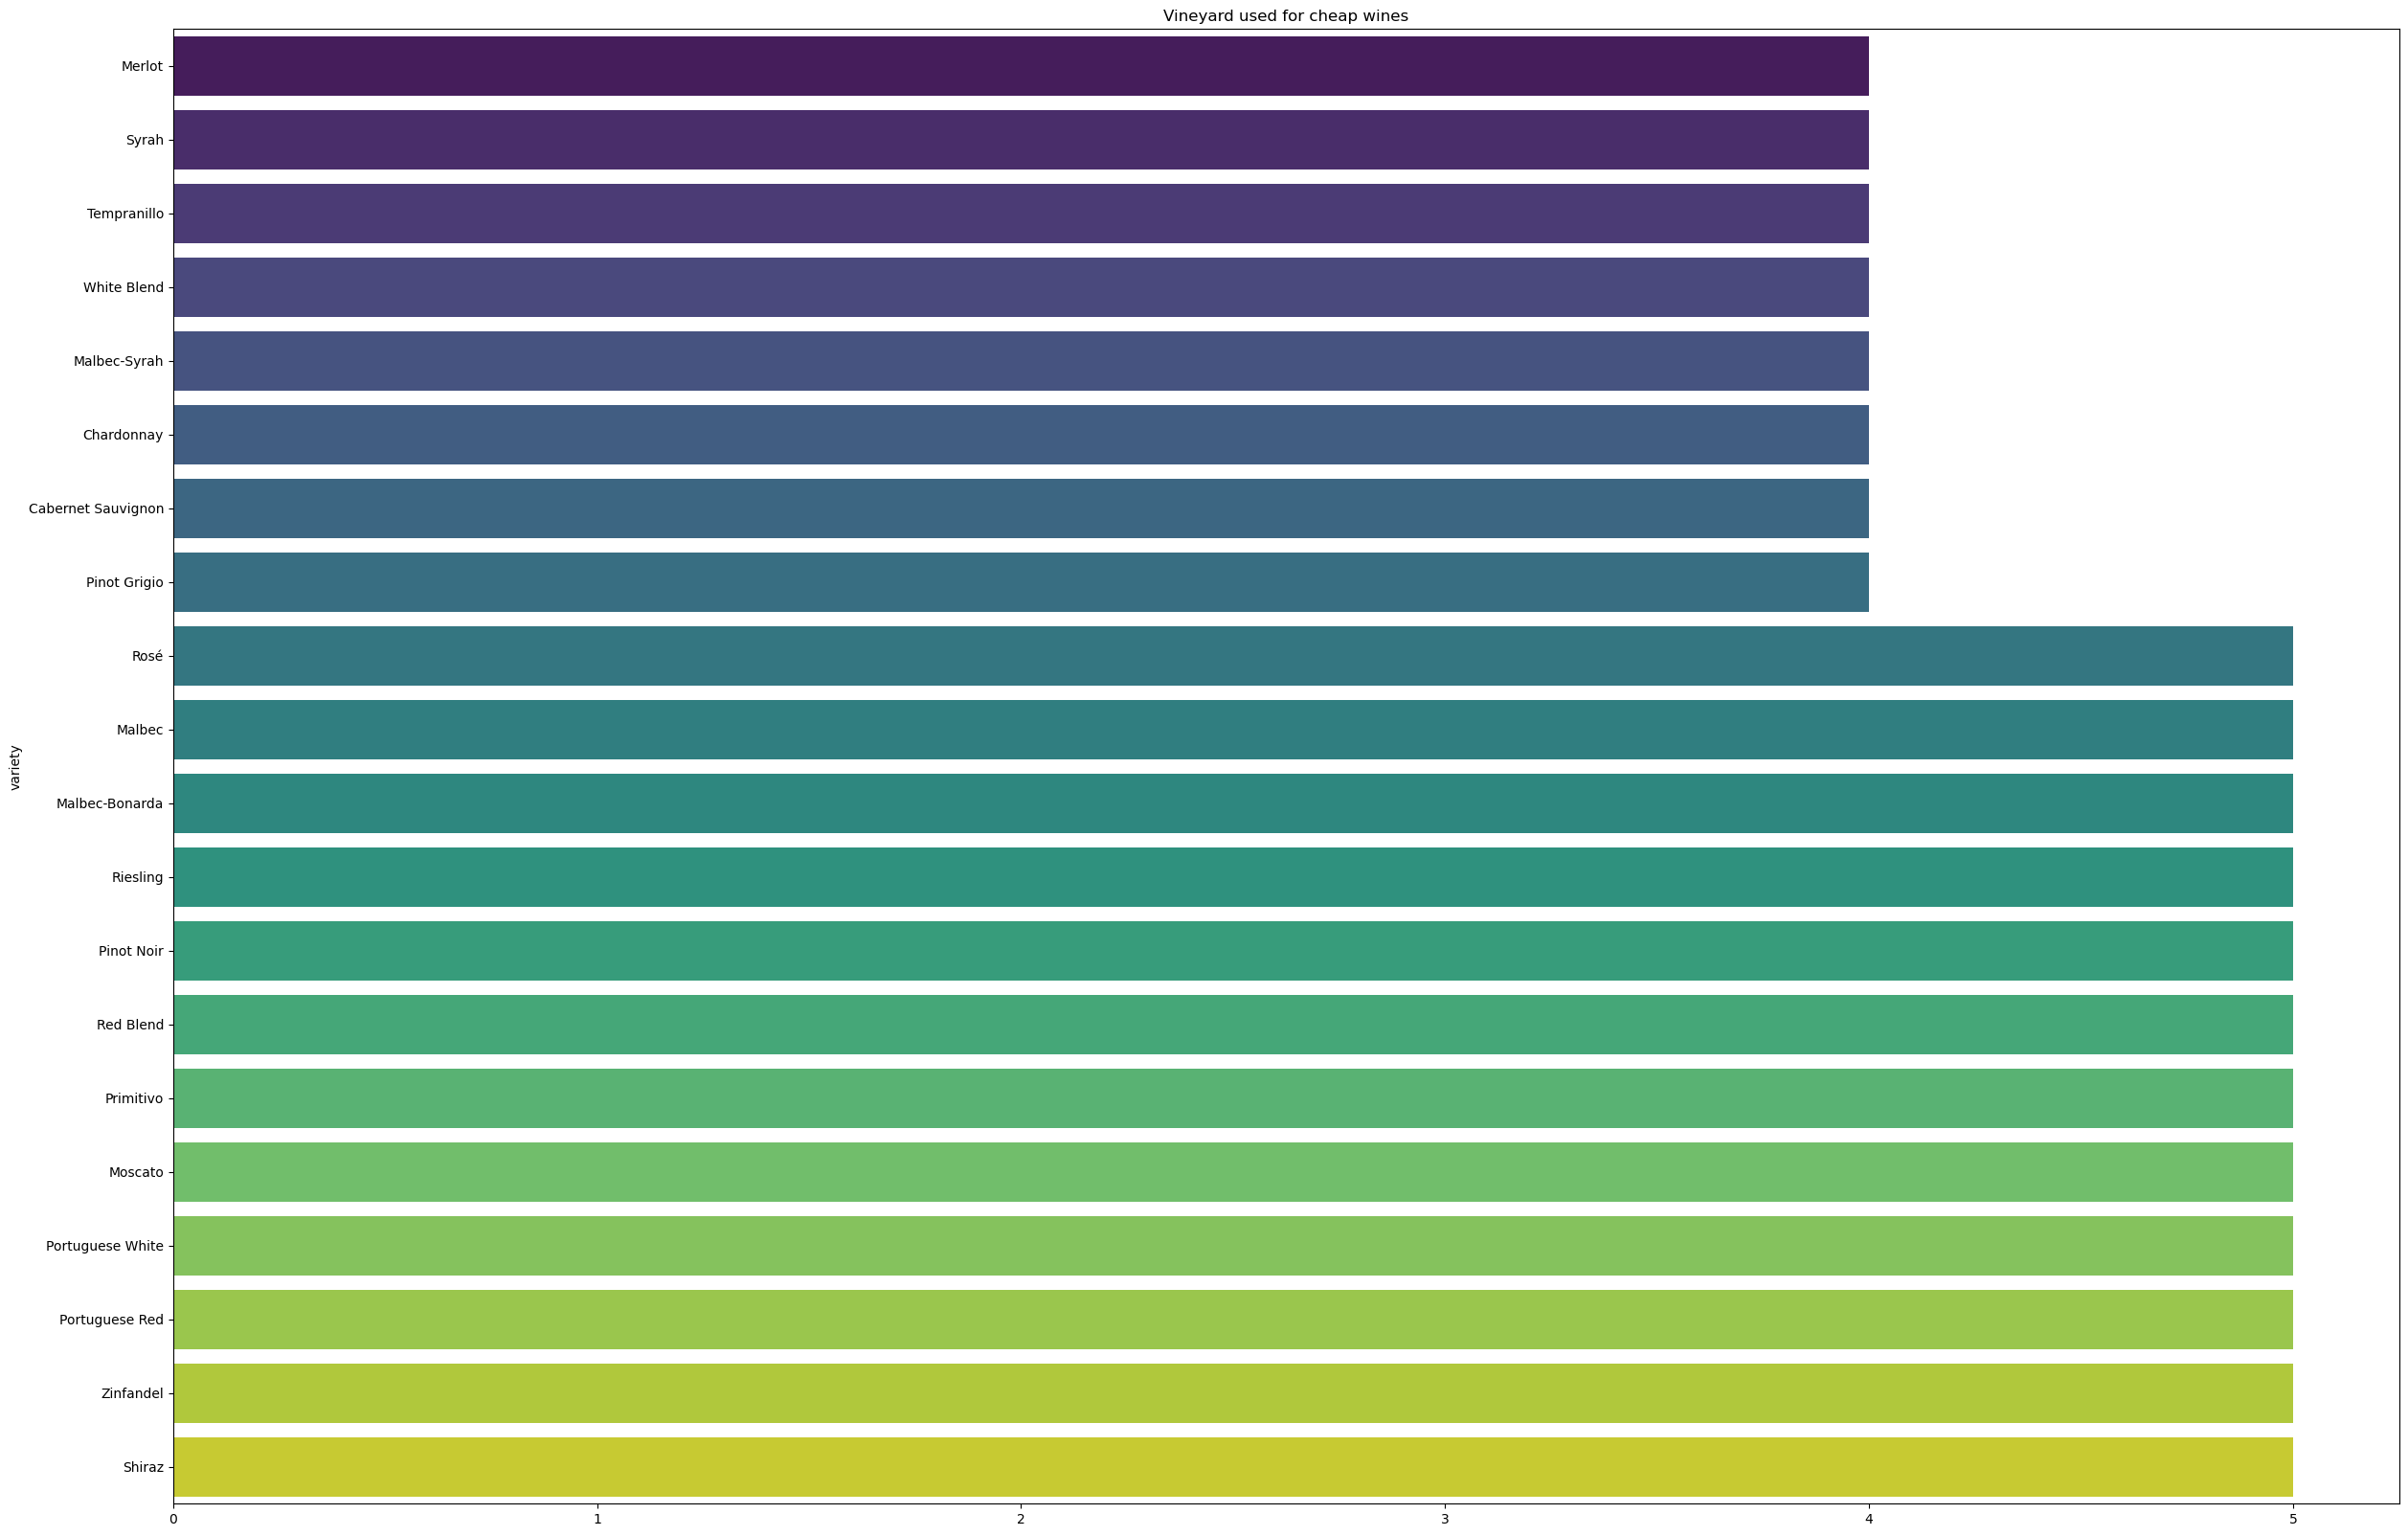

In [42]:
# Si possono ottenere info relative a quali vitigni vengono impiegati per i vini meno costosi e più costosi tramite un grafico 
# Per una panoramica completa ma ristretta scelgo i primi 20 più economici

plt.figure(figsize=(30,20))
cheap = df.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:20]
cheap_graph = sns.barplot( x = cheap['price'], y = cheap.index, palette = 'viridis')
cheap_graph.set_title('Vineyard used for cheap wines')
cheap_graph.set_ylabel('variety')
cheap_graph.set_xlabel('')
plt.show()

# Si nota che tra i più economici ci sono vini prodotti da ottimi vitigni : merlot e chardonnay ad un costo di 4$, riesling, moscato e shiraz ad un prezzo di 5$ 

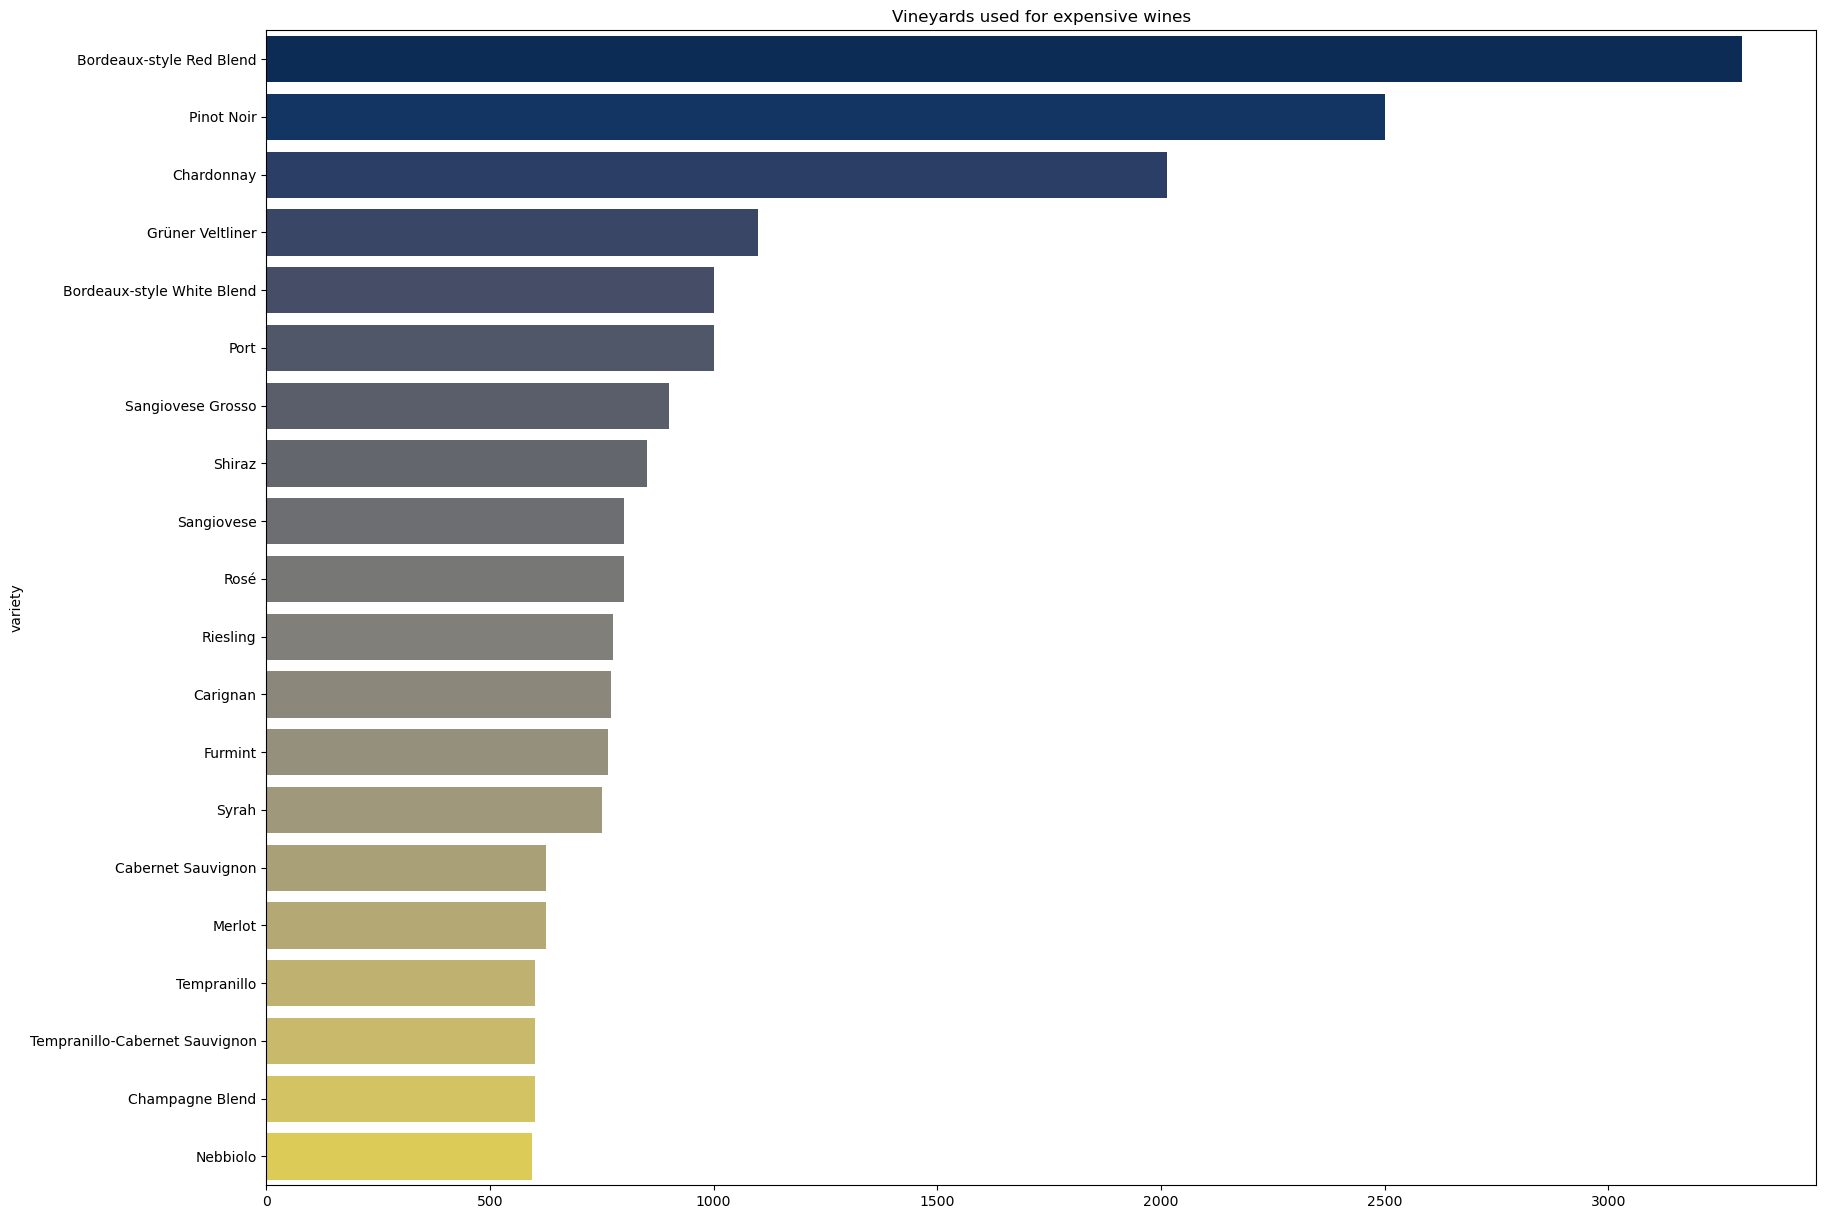

In [43]:
plt.figure(figsize=(20,15))
expensive = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:20]
exp_graph = sns.barplot(x = expensive['price'], y = expensive.index, palette='cividis')
exp_graph.set_title('Vineyards used for expensive wines')
exp_graph.set_ylabel('variety')
exp_graph.set_xlabel('')
plt.show()

In [44]:
# Per ottenere info ancora più interessanti relative a vini, sapere quali sono i vini più costosi e non solo i vitigni sarebbe ancora più utile 
# Mando a schermo raggruppando per title (ha menoi valori nulli) e filtrando per prezzo cercando i massimi, una lista dei 20 vini più costosi.
print(df.groupby(['title'])['price'].max().sort_values(ascending=False)[:20])
# Dalla lista si evince la presenza di vini eccezionali :
# 2) Château Pétrus 2014  Pomerol ad un prezzo di : 2500$
# 4) Blair 2013 Roger Rose Vineyard Chardonnay ad un prezzo di : 2013$
# 10) Château Lafite Rothschild 2010  Pauillac ad un prezzo di : 1300$

title
Château les Ormes Sorbet 2013  Médoc                                     3300.0
Château Pétrus 2014  Pomerol                                             2500.0
Domaine du Comte Liger-Belair 2010  La Romanée                           2500.0
Blair 2013 Roger Rose Vineyard Chardonnay (Arroyo Seco)                  2013.0
Château Pétrus 2011  Pomerol                                             2000.0
Domaine du Comte Liger-Belair 2005  La Romanée                           2000.0
Château Margaux 2009  Margaux                                            1900.0
Château Cheval Blanc 2010  Saint-Émilion                                 1500.0
Château Lafite Rothschild 2010  Pauillac                                 1500.0
Château Mouton Rothschild 2009  Pauillac                                 1300.0
Château Haut-Brion 2009  Pessac-Léognan                                  1200.0
Domaine du Comte Liger-Belair 2006  La Romanée                           1125.0
Château La Mission Haut-Brion 2009

 RATING VINI 

In [45]:
# Controllare quali sono i vini con punteggio più alto è altrettanto utile per un marketplace sapendo csoi quali sono stati i prodotti più apprezzati
df.groupby(['title'])['points'].max().sort_values(ascending=False)[:20]
# Ben 19 vini hanno ricevuto il punteggio massimo
# Molti sono vini estremamente famosi e ricercati come : 
# 1) Il Cerretalto del 2007 della acntina casanova neri (Brunello di Montalcino)
# 2) Il Masseto del 2007 prodotto alla Tenuta Dell' Ornellaia (uno dei leggendari Supertuscan)
# 3) Lo Château Lafite Rothschild 2010  Pauillac (compare e non sorprende la sua presenza anche in questa analsi)
# 4) Lo Champagne Krug del 2002

title
Château Léoville Barton 2010  Saint-Julien                          100
Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA))             100
Cardinale 2006 Cabernet Sauvignon (Napa Valley)                     100
Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen)             100
Verité 2007 La Muse Red (Sonoma County)                             100
Quinta do Noval 2011 Nacional Vintage  (Port)                       100
Château Cheval Blanc 2010  Saint-Émilion                            100
Avignonesi 1995 Occhio di Pernice  (Vin Santo di Montepulciano)     100
Casa Ferreirinha 2008 Barca-Velha Red (Douro)                       100
Château Léoville Las Cases 2010  Saint-Julien                       100
Krug 2002 Brut  (Champagne)                                         100
Casanova di Neri 2007 Cerretalto  (Brunello di Montalcino)          100
Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))          100
Tenuta dell'Ornellaia 2007 Masseto Merlot (Toscana)       

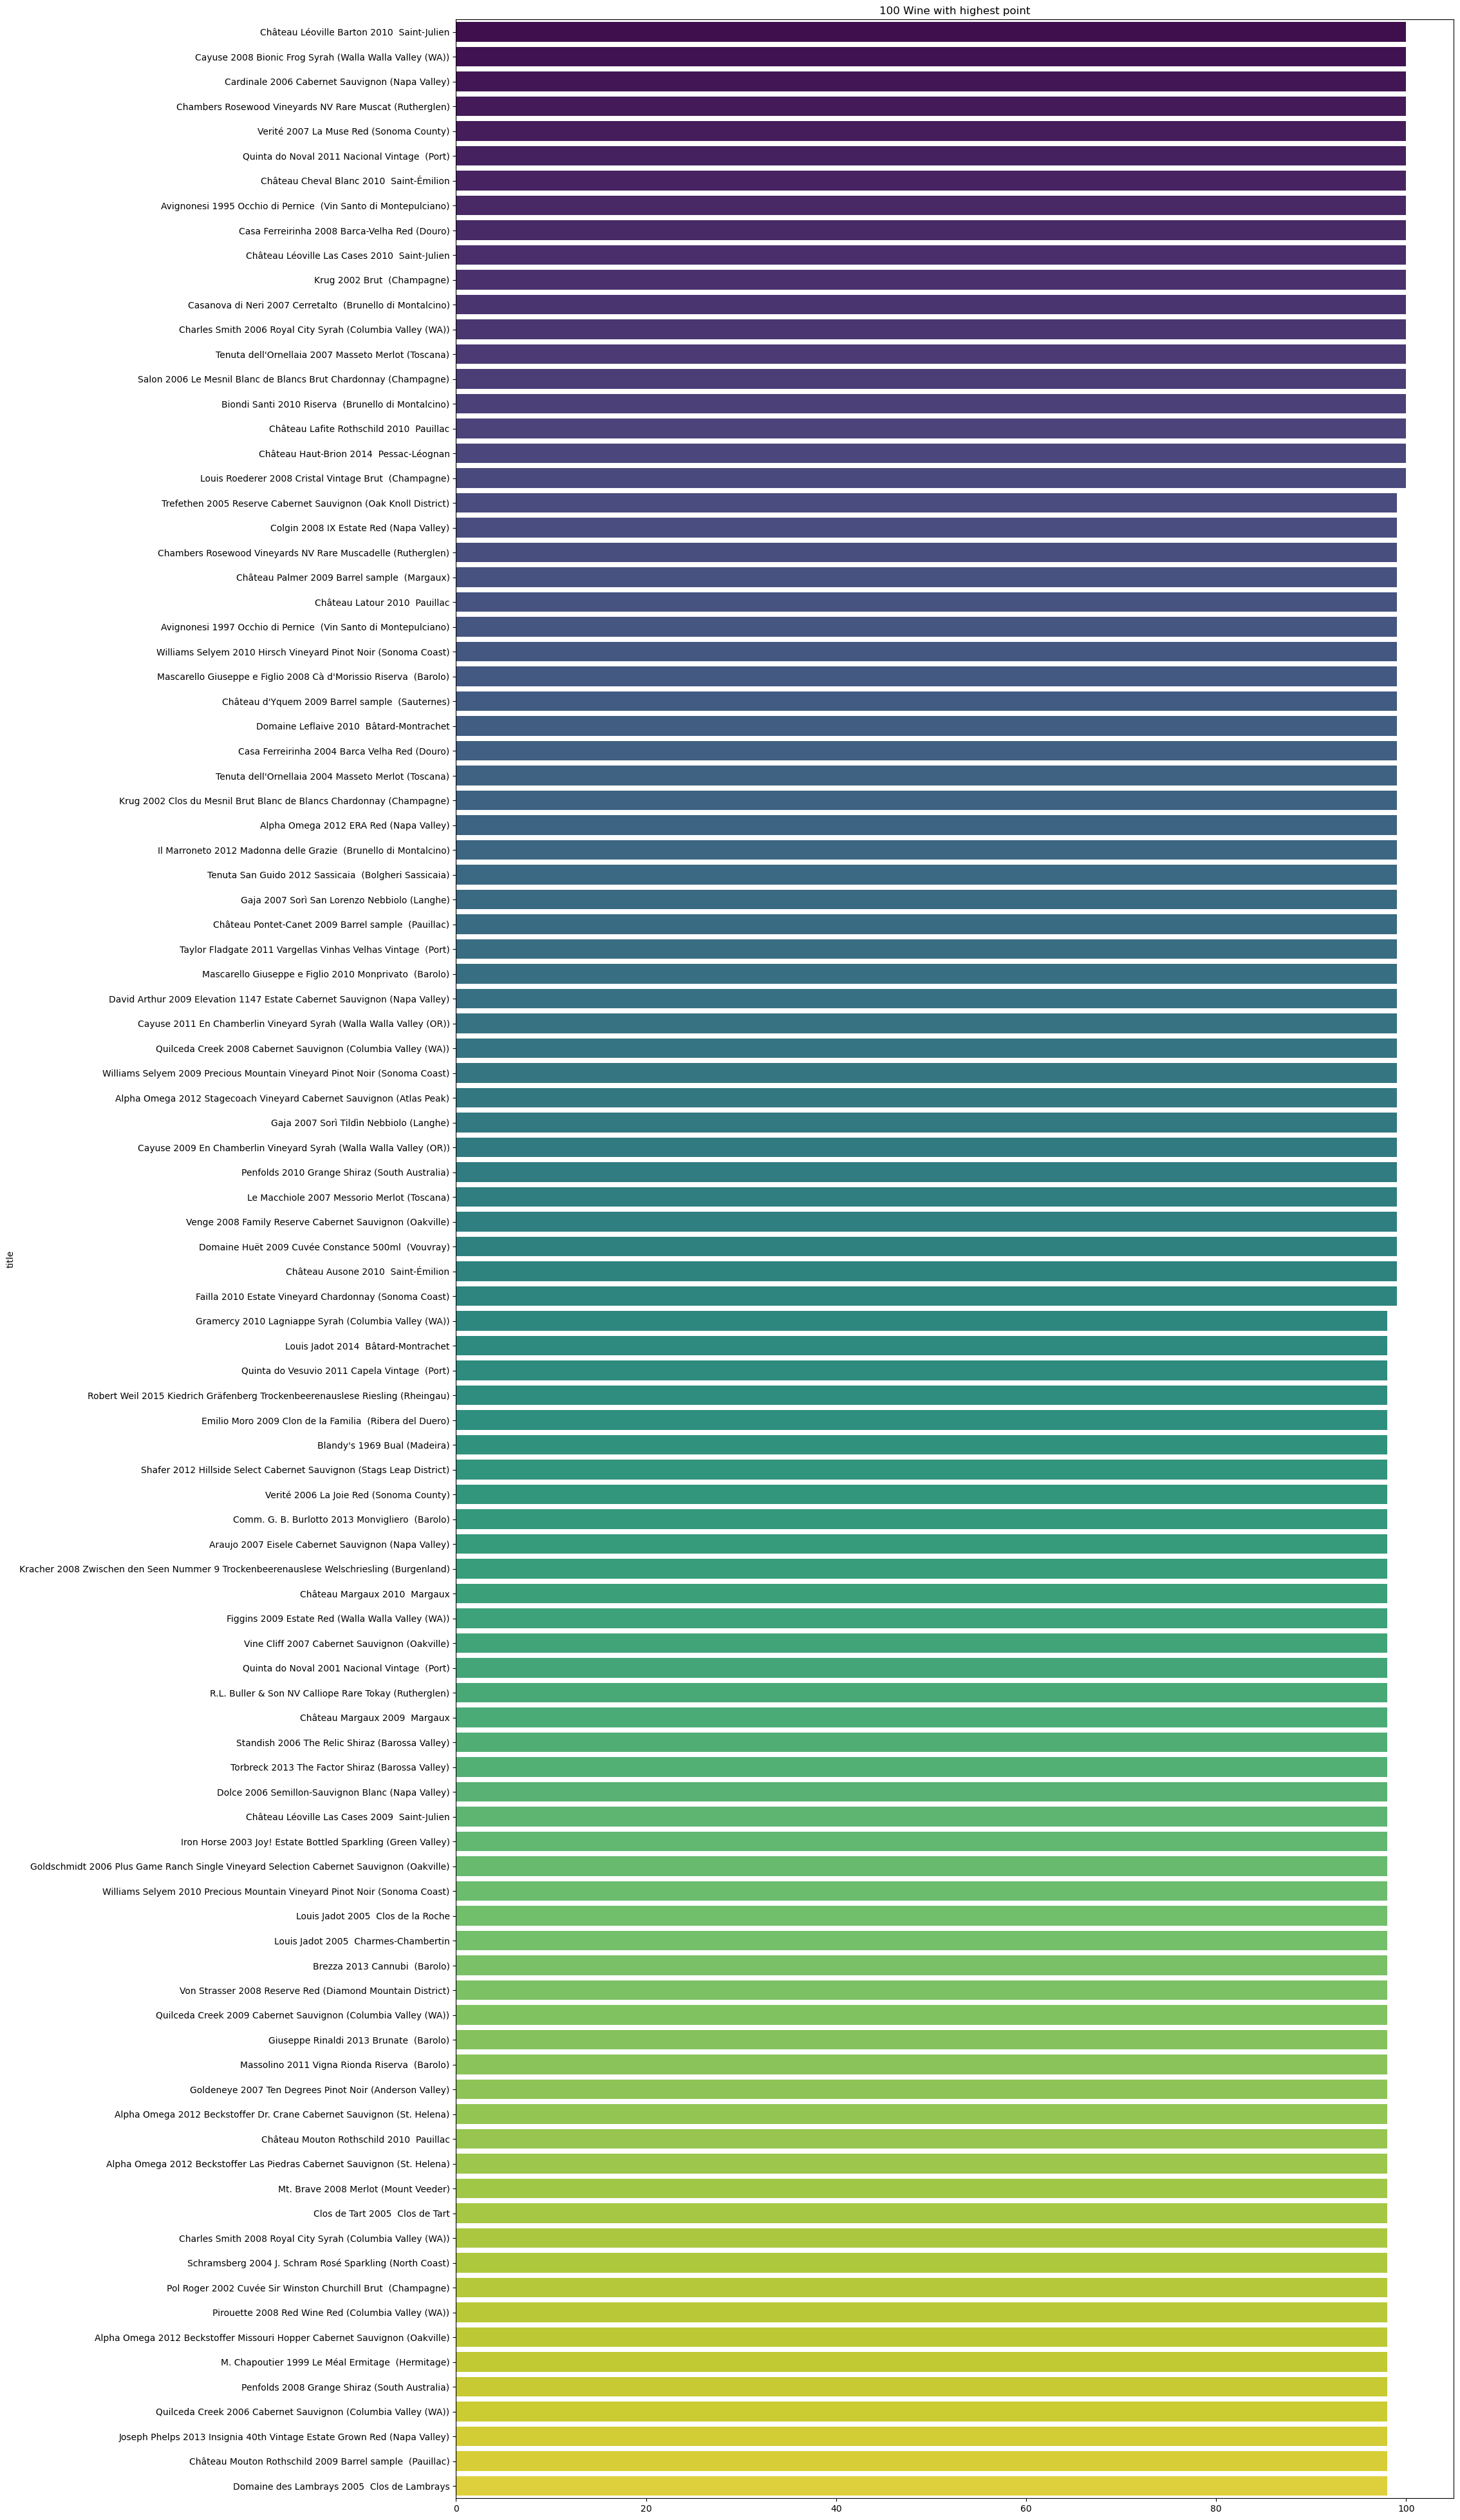

In [46]:
# Visualizzo con un grafico i 100 vini con il punteggio più alto, grazie a 'viridis' si intusce che quando il colore cambia anche se di poco significa che il punteggio è diverso 
plt.figure(figsize=(20,50))
rating = df.groupby(['title'])['points'].max().sort_values(ascending=False).to_frame()[:100]
ratings_graph = sns.barplot(x = rating['points'], y = rating.index, palette = 'viridis')
ratings_graph.set_title('100 Wine with highest point')
ratings_graph.set_ylabel('title')
ratings_graph.set_xlabel('')
plt.show()

ANALISI E VISUALIZZAZIONI DEI TASTER

In [47]:
# Interessante anche avere informazioni inerenti ai taster/recensori.
df.groupby('taster_name')['points'].describe()
# Raggruppo per i nomi ed eseguo ddescribe per avere dei dati statistici sui loro punteggi assegnati ai vini.
# Può essere interessante rispondere alle domanda : chi ha una media più alta? si nota che solo due taster abbattono il muro dei 90 : Anne Krebiehl MW con una media di 90,62 e Matt Kettmann	con una media di 90,06 
# Oppure quale e quanti recensori hanno asseganto almeno una volta il punteggio di 100? Sorprendentemente solamente 4, quindi tutti i vini con punteggi = 100 sono stati assegnati da : Joe Czerwinski, Paul Gregut, Roger Voss e Kerin O’Keefe.
# Un altra info interessante che si evince è che per ogni taster non ci sono std elevate, quindi le valutazioni/points si discostano poco dalle loro medie.

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Alexander Peartree,383.0,85.780679,1.941269,80.0,85.0,86.0,87.0,91.0
Anna Lee C. Iijima,4017.0,88.416480,2.610994,80.0,87.0,88.0,90.0,98.0
Anne Krebiehl MW,3290.0,90.625228,2.423842,80.0,89.0,90.0,92.0,97.0
Carrie Dykes,129.0,86.356589,2.026382,81.0,85.0,87.0,88.0,92.0
Christina Pickard,6.0,87.833333,3.600926,82.0,87.0,88.0,89.0,93.0
Fiona Adams,24.0,86.750000,1.775436,82.0,86.0,87.0,88.0,91.0
Jeff Jenssen,436.0,88.330275,2.074719,82.0,87.0,89.0,89.0,97.0
Jim Gordon,3766.0,88.603558,2.745278,80.0,87.0,89.0,91.0,97.0
Joe Czerwinski,4766.0,88.524339,2.903436,80.0,87.0,89.0,91.0,100.0


<Axes: xlabel='taster_name', ylabel='points'>

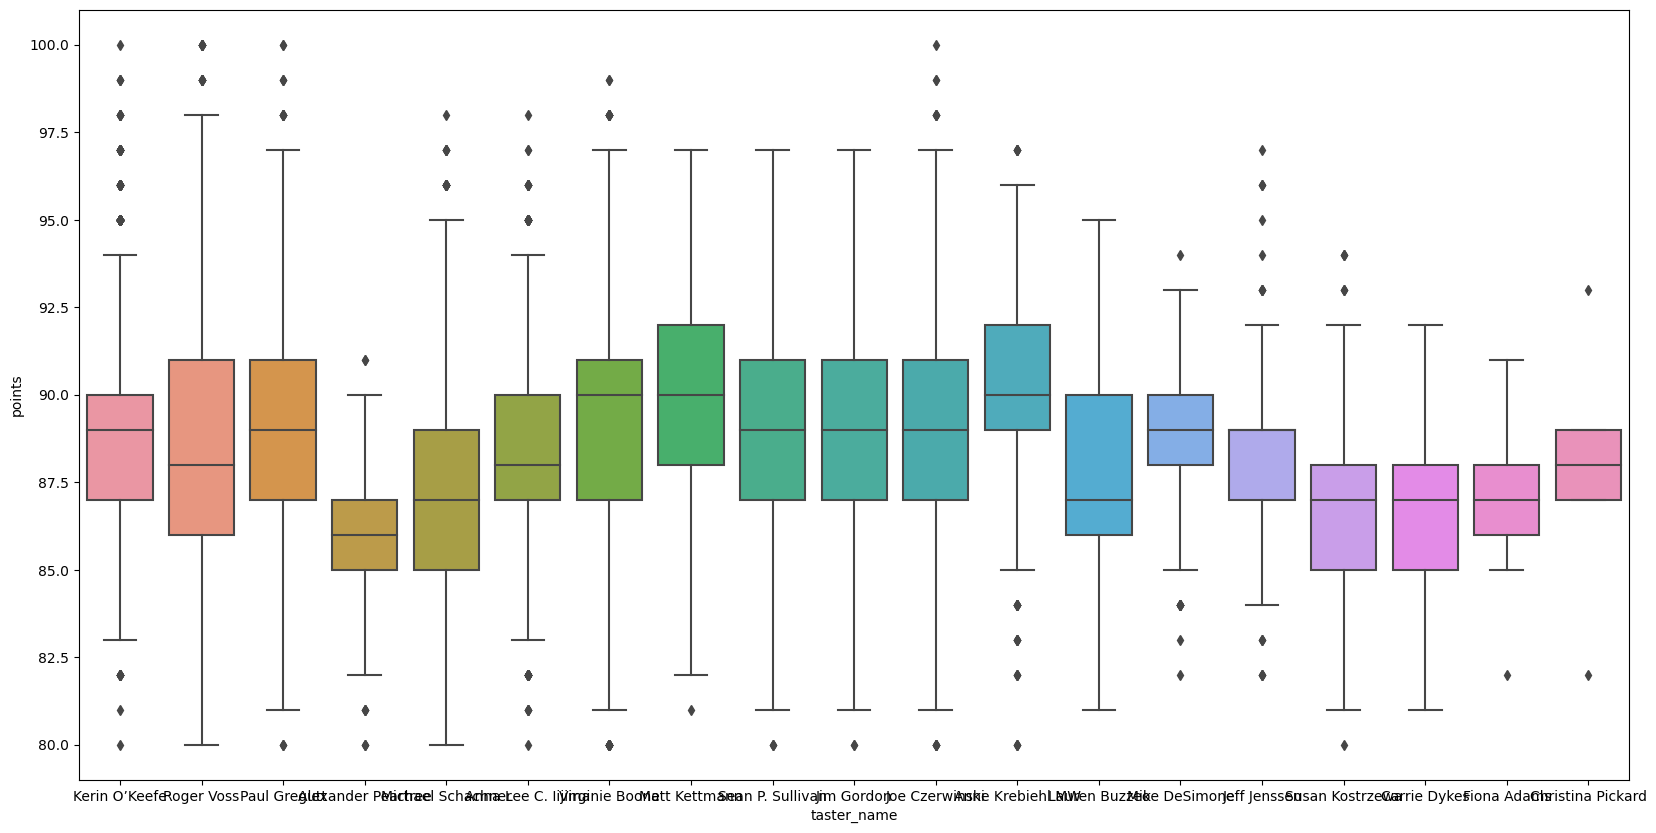

In [48]:
# Precedentemente con la tabella ottenuta da describe() si possono vedere garzie ai valori min e max che non sono presenti outliers che falsano le statistiche.
# Tuttavia un garfico chiarirà i dubbi per in non addetti ai lavori e anche per praticità.

plt.figure(figsize=(20,10))
sns.boxplot(y = 'points', x = 'taster_name', data = df)

# Si nota che sono presenti valori anomali ma solamente perchè si discostano molto dai limiti dei "baffi" del grafico, tuttavia nessuno supera i 100 points o scende sotto gli 80 points, di conseguenza sono outliers che non falsano i dati.

In [49]:
# Chi è il taster che ha effettuato più recensioni?
df['taster_name'].value_counts()
# Grazie a questa semplice riga di codice,
# si nota che un certo Rogers Voss ha una frequanza nettamente superiore agli altri con 23560 recensioni.

Roger Voss            23560
Michael Schachner     14046
Kerin O’Keefe          9697
Paul Gregutt           8868
Virginie Boone         8708
Matt Kettmann          5730
Joe Czerwinski         4766
Sean P. Sullivan       4461
Anna Lee C. Iijima     4017
Jim Gordon             3766
Anne Krebiehl MW       3290
Lauren Buzzeo          1700
Susan Kostrzewa        1023
Mike DeSimone           461
Jeff Jenssen            436
Alexander Peartree      383
Carrie Dykes            129
Fiona Adams              24
Christina Pickard         6
Name: taster_name, dtype: int64

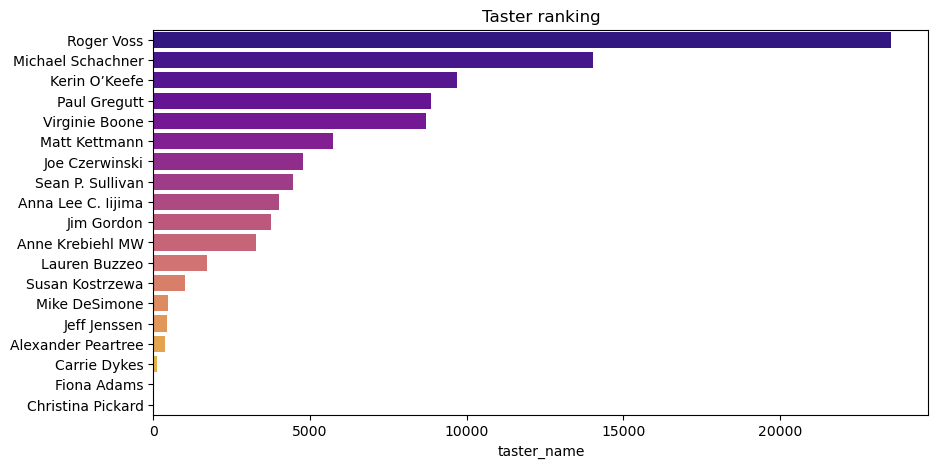

In [50]:
# Per avere più chiara la differenza e vederne visivamente un ranking, il grafico è sempre la scelta migliore. 
plt.figure(figsize=(10,5))
taster = df['taster_name'].value_counts().to_frame()
sns.barplot( x = taster['taster_name'], y = taster.index, data = taster, palette = 'plasma')
plt.title('Taster ranking')
plt.show()
# Attreverso il grafico si può dare forma ai numeri visti precedentemente
# Si nota la differenza tra Roger Voss e gli altri taster (già menzionata)
# Michael Scharachner in seconda posizione 
# Tra la terza posizione e la quinnta cala abbastanza uniformemente, per poi scendere nettemante alla sesta posizone 
# Dalla sesta posizione di Matt Kettmann all undicesima di Anne Krebiehl c'e un altro calo uniforme
# Infine si scende e si arriva all ultima posizione di Cristina Pickard con una barra pressochè inesistente

In [51]:
# Per sapere quali vini hanno ricevuto points = 100 e se il taster è indicato basta utilizare loc e i filtri sulle colonne di interesse.
df.loc[(df['points'] == 100) & (df['taster_name'])]
# Si ottengono anche le altre info dato che utilizzo il df di partenza
# Includendo taster_name nel filtro evito che mi restituisca nella tabella vini che hanno un punteggio = 100 ma senza taster

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
111753,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
111755,France,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
111756,France,"A hugely powerful wine, full of dark, brooding...",NaN,100,359.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases


CORRELAZIONE 

C:\Users\mirko\AppData\Local\Temp\ipykernel_8656\2615754643.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,points,price
points,1.000000,0.416534
price,0.416534,1.000000


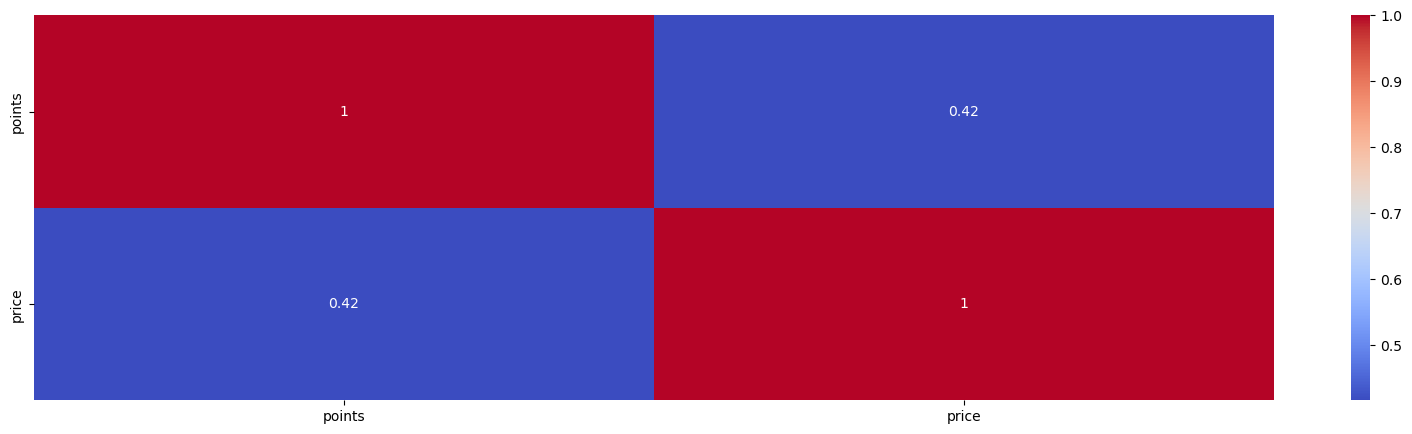

In [52]:
# Come richiesto dalla traccia:
# Esiste una correlazione tra points e price?

plt.figure(figsize=(20,5))
correlation = df.corr()
sns.heatmap(correlation, cmap ='coolwarm', annot = True)

correlation

# Dal grafico si evince che c'è una correlazione di 0,42, è positiva, ma tuttavia non è forte come ci si potrebbe aspettare.

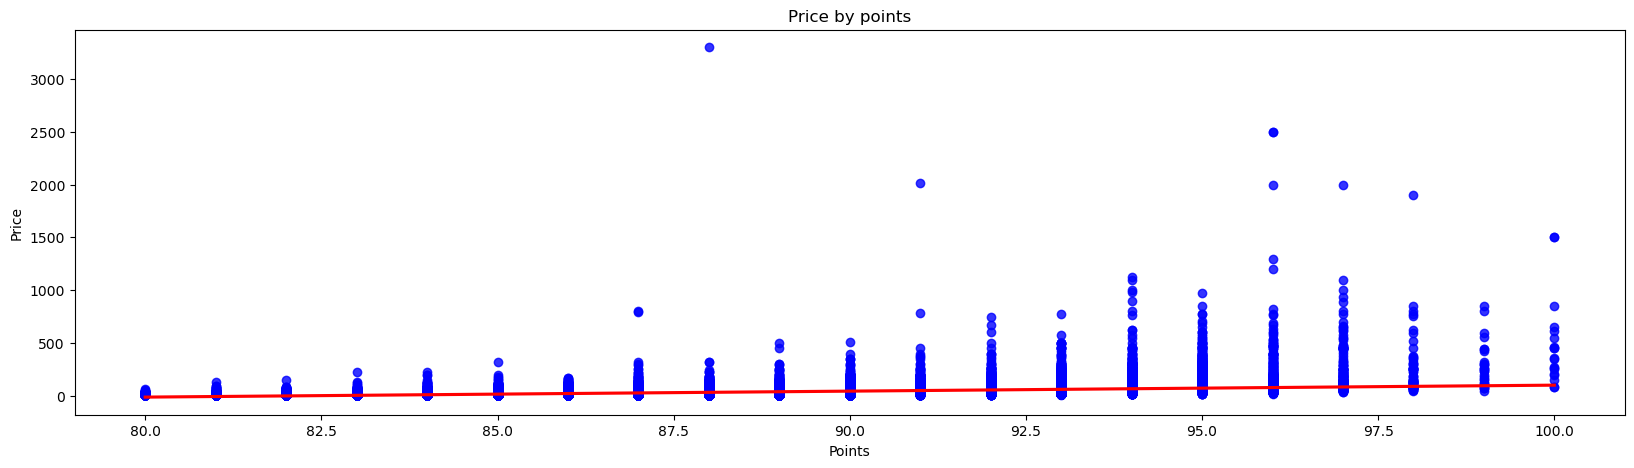

In [53]:
# Per avere più chiara la correlazione delle variabili price e points, una regressione è ottimale
plt.figure(figsize=(20,5))
regression = sns.regplot(x = 'points', y = 'price', data = df, fit_reg = True, line_kws = {'color':'red'}, color = 'blue')
regression.set_title('Price by points')
regression.set_ylabel('Price')
regression.set_xlabel('Points')
plt.show()
# Si nota facilmente osservando la retta che è davvero bassa la correlazione (seppur positiva) e la linea si adatta molto male ai dati
# Con questo grafico si può affermare che il prezzo del Bordeaux da 3300$ non dipende dalle valutazioni, è semplicemente imposto dal produttorre.
# Si può quindi affermare che un vino se ha un prezzo esorbitante non è necessariamente di alta qualità 

Per scegliere i prodotti da vendere on-line seguirò delle semplici regole di base e valutazioni personali :
1) Cercherò di mettermi nei panni della clientela che ho avuto modo di osservare quando ero un commis sommelier
2) Combinare nuove realtà e vini prodotti dalle cantine tradizionali
3) l'innovazione fa tendenza, ma avere affinità con i prodotti è essenziale per la vendita e il superamemto di problemi
4) Generalmente si tende a valorizare prodotti di altissima qualità a un prezzo accessibile a tutti, anche in contesti di lusso.

In [54]:
wine = df[['country','title','description','points','price','variety']]
# Osservando meglio le colonne noto che posso estarre info utili in maniera differente rispetto al precedente codice
# Rendo più sintetico il df estraendo le cols interessate ed evitando le altre che in questo momento trovo poco utili
# Ho scelto la colonna title perchè racchiude tutte le info : nome del vino,nome della cantina,regione/locazione e annata
wine
# Grzie a questo codice rendo il tutto più sintetico

,country,title,description,points,price,variety
0,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir
...,...,...,...,...,...,...
129966,Germany,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling
129967,US,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir
129968,France,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer
129969,France,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris


In [55]:
# Ho deciso di estrre vini con un punteggio >= 95, e prezzo <= 50
# Le ragione è semplice : il prezzo di un vino non dipende troppo dal punteggio, spesso i migliori vini presentano prezzi accessibili.

In [56]:
# Con i seguenti codici voglio estrarre info riguardo ai vini con i punteggi più alti dei 3 maggiori produttori al mondo ; Italia, Francia e US.
wine[(wine['country'] == 'Italy') & (wine['points'] >= 95) & (wine['price'] <= 50 )]
# Ho immaginato che mi venisse chiesto di estrarre una lista di vini di alto livello da cui attingere, ma che abbiano rapporto qualità prezzo alla portata di tutti 
# Ottenendo un elenco dei vini con punteggio > di 95 ad un prezzo contenuto <= 50$, prodotti dal 1st produttore mondiale 
# Tra le eccelenze che potrei consigliare sin presentano :
# 1) 3 vini toscani molto conosciuti : il brunello della cantina 'il colle' del 2011, il brunello della cantina 'casanova di neri' del 2007, e il brunello di montalcino della cantina 'baricci' del 2012. Tutti e 3 prodotti da uva sangiovese, con punteggi di 96,95 e 96 e un prezzo di 45$,50$ e 50$
# 2) 1 vinno che nella mia regione è molto conosciuto ed apprezzato : il barolo marcenasco della cantina ratti, da uva nebbiolo, punteggio 95 e un prezzo di 50$

,country,title,description,points,price,variety
4523,Italy,Biondi 2014 Contrada Monte San Nicolò (Etna),"Fragrant and loaded with finesse, this opens w...",95,30.0,Red Blend
4524,Italy,Biondi 2014 Outis Rosso (Etna),"This gorgeous wine opens with aromas of smoke,...",95,40.0,Red Blend
4527,Italy,COS 2014 Pithos Rosso Red (Vittoria),"Radiant and earthy, this blend of Frappato and...",95,30.0,Red Blend
11186,Italy,Benanti 2009 Etna,"Here's a gorgeous, delicious wine that's all a...",95,50.0,Nerello Mascalese
15190,Italy,Il Colle 2010 Brunello di Montalcino,A few minutes in the glass releases quintessen...,95,46.0,Sangiovese
25330,Italy,Casanova di Neri 2007 Brunello di Montalcino,"This 2007 Brunello is a big, opulent pleasure ...",95,50.0,Sangiovese Grosso
27600,Italy,Il Colle 2011 Brunello di Montalcino,"Red berry, wild mint, crushed rose, forest flo...",96,45.0,Sangiovese
27608,Italy,Abbazia di Novacella 2015 Praepositus Kerner (...,You'll need to swirl the glass a few times to ...,95,25.0,Kerner
40309,Italy,Isole e Olena 2010 Chianti Classico,This stunning Chianti Classico has an intense ...,96,27.0,Red Blend
44592,Italy,Capanna 2011 Brunello di Montalcino,"Scents of wild berry, fragrant blue flower, ti...",95,50.0,Sangiovese


In [57]:
# Dalla lista estratta, sicuramente sono tutti estremamnte validi da mettere in vendita sul marketplace, tuttavia un vino che potrebbe raccogliere alto interesse e fare un gran n° di vendite sarebbe il marcenasco.
wine.loc[83923]
# Abbiamo cosi tutte le info utili : vino italiano, prodotto dalla cantina renato ratti da vitigno nebbiolo, l'analisi organolettica,annata di produzione 2013, punnteggio 95 e prezzo 50$

country                                                    Italy
title                     Renato Ratti 2013 Marcenasco  (Barolo)
description    Wild berry, crushed herb, violet and baking sp...
points                                                        95
price                                                       50.0
variety                                                 Nebbiolo
Name: 83923, dtype: object

In [58]:
# Si sa che i vini francesi sono i più costosi al mondo, ma alcuni possono essere all portata di tutti,
# mi sono immaginato di selezionare per l' azienda una lista di vini francesi di alto livello, ma ad un prezzo ragionevole
wine[(wine['country'] == 'France') & (wine['points'] > 95) & (wine['price'] <= 50 )]
# Ottengo un elenco dei vini con punteggio > di 95 e prezzo <50$, prodotti e un prezzo dal 2nd produttore mondiale

,country,title,description,points,price,variety
9901,France,Domaines Schlumberger 2014 Saering Grand Cru R...,A touch of lemon balm adds a breezy freshness ...,96,29.0,Riesling
9903,France,Julien Schaal 2016 Rangen de Thann Grand Cru R...,Glorious and utterly enticing notes of peach h...,96,45.0,Riesling
9904,France,Kuentz-Bas 2015 Geisberg Grand Cru Riesling (A...,There is a glorious touch of ripe peach among ...,96,42.0,Riesling
15848,France,Château Malartic-Lagravière 2014 Pessac-Léognan,A tightly coiled rich wine that has great acid...,96,50.0,Bordeaux-style White Blend
45986,France,Château Coutet 2014 Barsac,"Powered by intense botrytis, this wine is opul...",97,45.0,Bordeaux-style White Blend
45992,France,Château Filhot 2014 Sauternes,"With its apricot and honeyed flavors, this is ...",96,28.0,Bordeaux-style White Blend
89730,France,René Muré 2015 Clos Saint Landelin Vorbourg Gr...,The heady aromatic scent of fresh tangerine pe...,97,50.0,Riesling
89738,France,Domaine Barmès-Buecher 2015 Steingrubler Grand...,Tender pure peach and fine spicy notions of gr...,96,38.0,Riesling
104193,France,Domaine Weinbach 2011 Schlossberg Grand Cru Ri...,"This is, quite simply, great Riesling. It has ...",96,37.0,Riesling
116149,France,Domaine Ostertag 2015 Fronholz Riesling (Alsace),Peach and tangerine unite to create an utterly...,96,48.0,Riesling


In [59]:
# Se dovessi consigliare in base alle conoscenze di dominio, farei pesente : il bordeaux bianco della cantina Chateau Coutet.
# Famosa la sua annata del 2022 di altissimo livello ma poco accessibile, l'annata 2014 sarebbe un ottimo compromesso.
wine.loc[45986]
# Ottengo cosi tutte le info indispensabili :
# Cantina : chateau coutet
# Punteggio : 97
# Vitigno : mix di uve bianche non specificate, ma probabilmente avrà una netta prevalenza di sémillon (90-95%).

country                                                   France
title                                Château Coutet 2014  Barsac
description    Powered by intense botrytis, this wine is opul...
points                                                        97
price                                                       45.0
variety                               Bordeaux-style White Blend
Name: 45986, dtype: object

In [60]:
# Continuo l'analisi con gli USA. 
# Erroneamnete considerati una potenza emergente nel mercato del vino, in realtà l'eccellente lavoro svolto in napa valley ha permesso loro di scalare le classifiche velocemente, divenendo probabilmete i migliori.
wine[(wine['country'] == 'US') & (wine['points'] >= 95) & (wine['price'] <=50)]
# Ottengo un elenco dei vini con punteggio > di 95 prodotti dal 1st produttore mondiale
# e ben 226 vini prodotti in USA hanno ricevuto un punteggio uguale o superiore a 95 tra cui poter scegliere 

,country,title,description,points,price,variety
364,US,Winderlea 2014 Weber Vineyard Pinot Noir (Dund...,"For 2014, the Weber is the star of a very fine...",95,48.0,Pinot Noir
1560,US,Pirouette 2008 Red Wine Red (Columbia Valley (...,"A stunning Pirouette—63% Cabernet Sauvignon, 2...",98,50.0,Bordeaux-style Red Blend
2513,US,Trisaetum 2013 Estates Reserve Riesling (Willa...,Sourced from the best barrels made at the wine...,95,32.0,Riesling
3064,US,DeLille 2009 Chaleur Estate Blanc White (Colum...,"Consistent year after year, this blend of 67% ...",95,36.0,Bordeaux-style White Blend
4504,US,Limerick Lane 2013 Rocky Knoll Zinfandel (Russ...,"This wine is insanely good, from a dry-farmed,...",97,50.0,Zinfandel
...,...,...,...,...,...,...
126242,US,Poet's Leap 2009 Riesling (Columbia Valley (WA)),"With residual sugar at about 1.35%, this balan...",95,20.0,Riesling
126247,US,Woodward Canyon 2007 Merlot (Columbia Valley (...,"True to the dense, muscular style of Woodward ...",95,39.0,Merlot
127577,US,Failla 2008 Pearlessence Pinot Noir (Sonoma Co...,"A terrific Pinot Noir that's so delicious, you...",95,40.0,Pinot Noir
128268,US,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,A monumental Cabernet that succeeds on every l...,97,50.0,Cabernet Sauvignon


In [61]:
# Mi sono immaginato di dover consigliare secondo le mie conoscenze di dominio un vino americano di altissimo livello ma sempre con un prezzo "abbastanza accessibile", e ho deciso di verificarne la presenza nel dataset.
# I vini prodotti nella napa valley da vitigno cabernet sauvignon sono eccelsi, 
# tra cui : il cabernet sauvignon Oakville double diamond 2019, vincitore dell premio "miglior vino del mondo" lo scorso anno.

In [62]:
wine[['points','price']] = wine[['points','price']].astype(str)
# utilizzo il casting per rendere i points una stringa, mi servirà in seguito per localizzare i cabernet sauvignon con points > 95

C:\Users\mirko\AppData\Local\Temp\ipykernel_8656\2233765658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine[['points','price']] = wine[['points','price']].astype(str)


In [63]:
wine[(wine['variety'].str.contains('Cabernet Sauvignon')) & (wine['country'] == 'US') & (wine['points'].str.contains('98'))]

# Ho optato per points = 98 perchè mi serviva estrre vini considerati di altissimo profilo
# Si nota immediatamente che provengono tutti dalla Napa Valley,
# tranne i 2 cabernet della catina Quilceda Creek coltivati nella Columbia valley dello stato di Washington, annate 2006 e 2009.

,country,title,description,points,price,variety
27592,US,Shafer 2012 Hillside Select Cabernet Sauvignon...,"The highly sought-after, perennially beautiful...",98,265.0,Cabernet Sauvignon
38978,US,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,We can debate the pricing on Yao Ming's new re...,98,625.0,Cabernet Sauvignon
39289,US,Vine Cliff 2007 Cabernet Sauvignon (Oakville),Pretty much as good as Napa Cabernet gets. Sho...,98,75.0,Cabernet Sauvignon
41837,US,Araujo 2007 Eisele Cabernet Sauvignon (Napa Va...,"Profoundly beautiful aroma on this Cab, a perf...",98,275.0,Cabernet Sauvignon
45799,US,Quilceda Creek 2006 Cabernet Sauvignon (Columb...,The 2006 flagship Cabernet from Quilceda Creek...,98,125.0,Cabernet Sauvignon
109837,US,Spottswoode 2013 Family Estate Grown Cabernet ...,This remarkable wine from the famed family-far...,98,185.0,Cabernet Sauvignon
116142,US,Alpha Omega 2012 Beckstoffer Las Piedras Caber...,"This bold, broad-shouldered wine shows focused...",98,250.0,Cabernet Sauvignon
116143,US,Alpha Omega 2012 Beckstoffer Missouri Hopper C...,"From another of the grower's impressive, covet...",98,250.0,Cabernet Sauvignon
116144,US,Alpha Omega 2012 Beckstoffer Dr. Crane Caberne...,From one of the warmest sites in the grower's ...,98,250.0,Cabernet Sauvignon
118060,US,Goldschmidt 2006 Plus Game Ranch Single Vineya...,"The 2006 vintage was erratic, but Nick Goldsch...",98,150.0,Cabernet Sauvignon


In [64]:
# Ho immaginato che l'ecommerce manager ne volesse sapere di più sui vini americani e le sue cantine 
# Dato che la cantina Shafer Celler (conosciuta come Shafer) è colei che ha prodotto il double diamond 2019, ho deciso di provare ad esplorare e verificare se fosse presente in questo dataset.
wine.loc[(wine['title'].str.contains('Shafer'))]
# Ottengo una lista da cui si potranno prendere decisioni di acquisto in base al punteggi e prezzo riguardo questa cantina.

,country,title,description,points,price,variety
1075,US,Shafer 2015 Red Shoulder Ranch Chardonnay (Car...,Always impressive in its grasp of power and gr...,94,52.0,Chardonnay
5025,US,Shafer 2008 Hillside Select Cabernet Sauvignon...,Another great Hillside Select from selected bl...,94,230.0,Cabernet Sauvignon
9230,US,Shafer 2005 One Point Five Cabernet Sauvignon ...,This is a sort of junior bottling to their wor...,87,70.0,Cabernet Sauvignon
15800,US,Shafer 2012 One Point Five Cabernet Sauvignon ...,Crushed blackberries compete with a hearty bou...,94,80.0,Cabernet Sauvignon
17349,US,Shafer 2013 Merlot (Napa Valley),"This is a robust, dense and tannic wine, with ...",90,55.0,Merlot
19138,US,Shafer 2000 Cabernet Sauvignon (Napa Valley),"Epitomizes the New World style of a superripe,...",93,48.0,Cabernet Sauvignon
27592,US,Shafer 2012 Hillside Select Cabernet Sauvignon...,"The highly sought-after, perennially beautiful...",98,265.0,Cabernet Sauvignon
31419,US,Shafer 2013 Relentless Syrah (Napa Valley),"This is a stunning, vibrantly robust and inten...",95,87.0,Syrah
32248,US,Shafer 2014 One Point Five Cabernet Sauvignon ...,"This powerful, savory bottling named for the t...",94,90.0,Cabernet Sauvignon
37445,US,Shafer 2005 Merlot (Napa Valley),"Shafer's Cabernet is so dominant, it's sometim...",91,46.0,Merlot


In [65]:
# Per concludere l'analisi sugli USA, mi sono immaginato che al manager potrebbero interessare info dettagliate su uno dei vini eccelsi prodotti dalla cantina shafer,
# in questo caso basta un semplice loc osservando la lista ottenuta precedentemente tramite filtri
wine.loc[122558]
# Notiamo che il prezzo è molto alto = 225$, così come il punteggio = 97 e che anch'esso è un cabernet sauvignon

country                                                       US
title          Shafer 2007 Hillside Select Cabernet Sauvignon...
description    In keeping with the voluptuous approachability...
points                                                        97
price                                                      225.0
variety                                       Cabernet Sauvignon
Name: 122558, dtype: object

In [66]:
# Infine puntare su un vino di altissima qualità e altissimo prezzo può non essere una buona idea, tuttavia se si vuole tentare questo approccio, le perdite si potrebbero contenere scegliendo adeguatamente il vino.
wine.loc[(df['price'] > 999)]

,country,title,description,points,price,variety
1558,France,Château Margaux 2009 Margaux,"A massive wine for Margaux, packed with tannin...",98,1900.0,Bordeaux-style Red Blend
1566,France,Château La Mission Haut-Brion 2009 Pessac-Léo...,"Such a generous and ripe wine, with a dark cor...",97,1100.0,Bordeaux-style Red Blend
1571,France,Château Haut-Brion 2009 Pessac-Léognan,"Solid, very structured, packed with dense and ...",96,1200.0,Bordeaux-style Red Blend
1575,France,Château Mouton Rothschild 2009 Pauillac,"The purest Cabernet Sauvignon fruit, with dark...",96,1300.0,Bordeaux-style Red Blend
15840,France,Château Pétrus 2014 Pomerol,The wine is a velvet glove in an iron fist. Th...,96,2500.0,Bordeaux-style Red Blend
36531,Portugal,W. & J. Graham's NV 90-year Old Tawny (Port),This Port was “rescued” from the darkest reces...,97,1000.0,Port
65352,France,Château Pétrus 2011 Pomerol,This extravagantly perfumed wine has great jui...,97,2000.0,Bordeaux-style Red Blend
69516,France,Château La Mission Haut-Brion 2009 Pessac-Léo...,This is the first vintage of a wine that used ...,94,1000.0,Bordeaux-style White Blend
80290,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux-style Red Blend
89478,Austria,Emmerich Knoll 2013 Ried Loibenberg Smaragd Gr...,"Wet earth, rain-wet stones, damp moss, wild sa...",94,1100.0,Grüner Veltliner


In [67]:
# tra i 13 vini francesi estratti precedentemente, figura uno dei migliori vini del mondo, prodotto da una delle più rinomate e apprezzate cantine esistenti :
print(wine.loc[111753])
# Un Bordeaux, prodotto dalla cantina Chateau Lafite Rothschild nel 2010 venduto ad un prezzo di 1500$.
# Nonostante il prezzo, questo vino si vende facilmente ed è estremamente raro trovare qualcuno che non lo apprezzi, quindi sarebbe la scelta migliore per il nostro marketplace.

country                                                   France
title                   Château Lafite Rothschild 2010  Pauillac
description    Almost black in color, this stunning wine is g...
points                                                       100
price                                                     1500.0
variety                                 Bordeaux-style Red Blend
Name: 111753, dtype: object


In [68]:
# Tra i motivi per cui uno chateau lafite può non essere apprezzato, c'è la forte persistenza di un odore sulfureo dato dal ribes combinato con un sentore di sandalo.
# Posso verificare questa condizione se è vera, mandando a schermo la descrizione, così da poterlo valutare.
print(wine.loc[111753,'description'])
# Si nota infatti che questo vino viene descritto ricco, denso, con un forte senso di importanza e che i tannini e il ribes sono palpabili (nel gergo di un analisi olfattiva e gustativa di un vino significa che si percepiscono in ambo i casi)

Almost black in color, this stunning wine is gorgeous, rich and dense. It's grand and powerful, with a strong sense of its own importance. The beautiful tannins and the fragrant black currant fruits are palpable. It's a great wine, with huge potential.


In [69]:
# Infine, in base alle mie conoscenze, posso anche verificare in base ai 4 aggettivi più comuni nell'analisi organolettica, quanti vini del data set sono speziati, acidi,fruttati o terrosi.
for desc in wine['description'][:10]:
    print(desc.split(' '))
# Uso questo ciclo for per controllare come sono stati scritti gli aggettivi che mi interessano e prendere decisioni data driven

['Aromas', 'include', 'tropical', 'fruit,', 'broom,', 'brimstone', 'and', 'dried', 'herb.', 'The', 'palate', "isn't", 'overly', 'expressive,', 'offering', 'unripened', 'apple,', 'citrus', 'and', 'dried', 'sage', 'alongside', 'brisk', 'acidity.']
['This', 'is', 'ripe', 'and', 'fruity,', 'a', 'wine', 'that', 'is', 'smooth', 'while', 'still', 'structured.', 'Firm', 'tannins', 'are', 'filled', 'out', 'with', 'juicy', 'red', 'berry', 'fruits', 'and', 'freshened', 'with', 'acidity.', "It's", '', 'already', 'drinkable,', 'although', 'it', 'will', 'certainly', 'be', 'better', 'from', '2016.']
['Tart', 'and', 'snappy,', 'the', 'flavors', 'of', 'lime', 'flesh', 'and', 'rind', 'dominate.', 'Some', 'green', 'pineapple', 'pokes', 'through,', 'with', 'crisp', 'acidity', 'underscoring', 'the', 'flavors.', 'The', 'wine', 'was', 'all', 'stainless-steel', 'fermented.']
['Pineapple', 'rind,', 'lemon', 'pith', 'and', 'orange', 'blossom', 'start', 'off', 'the', 'aromas.', 'The', 'palate', 'is', 'a', 'bit',

In [70]:
tastes = ['spicy','smoky','fruity','earthy']
# Creo una lista che mi servirà per un altro ciclo for ed ottenere i risultati che cerco

[6000, 3676, 8340, 3962]


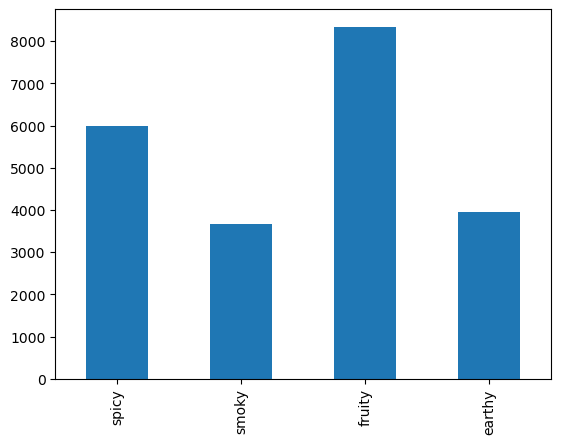

In [71]:
taste_count = []

for taste in tastes:
    num = len(wine[wine['description'].str.contains(taste)])
    taste_count.append(num)
print(taste_count)

pd.Series(taste_count, index = tastes).plot(kind = 'bar')
plt.show()

# Ottengo cosi un conteggio e un grafico per una visualizzazione più semplice dei 4 aggettivi : 6000=spicy, 3676=smoky, 8340=fruity e 3962=earthy.
# Una particolarità dei vini terrorsi, è che questi vini sono stati prodotti da coltivazioni in luoghi caratterizzati da stagion secche ma poi colpiti da violenti piogge. 
# In questo caso, questa tipologia di vini andrebbe valutata attentamente prima dell'acquisto a causa dell alta presenza di geosmina che può rendere un vino eccellente un vino pessimo. 

In [72]:
# C'è un buon numero di vini che includono la parola terroso (earthy).
# Una particolarità dei vini terrorsi, è che questi vini sono stati prodotti da coltivazioni in luoghi caratterizzati da stagion secche ma poi colpiti da violenti piogge. 
# In questo caso i vini andrebbero valutati attentamente prima dell'acquisto, a causa dell alta presenza di geosmina che può rendere un vino eccellente un vino pessimo. 
earthy = wine.loc[(wine['description'].str.contains('earthy'))]
# Ottengo un df con tutti i vini che includono la parola earthy da cui potrò scegliere accuratamente i vini.

In [73]:
vineyards = ['Nebbiolo','Cabernet Sauvignon','Sangiovese','Merlot']
# Scelgo di creare una lista con i 4 migliori vigneti che si adattano meglio alle condizioni menzionate precedentemente e che producono vini terrosi eccellenti

[97, 384, 111, 142]


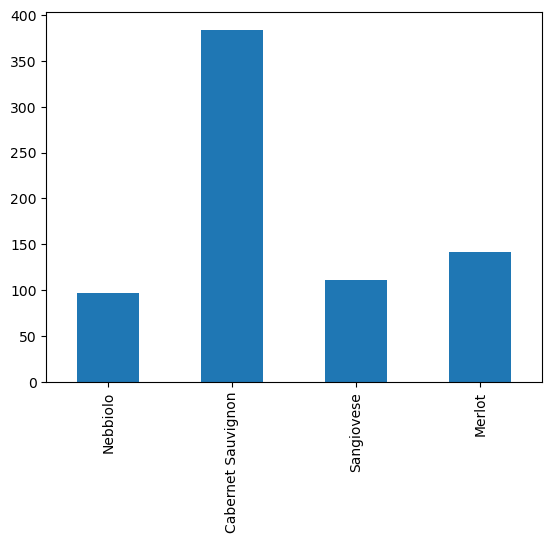

In [74]:
vineyard_count = []

for vineyard in vineyards:
    num = len(earthy[earthy['variety'].str.contains(vineyard)])
    vineyard_count.append(num)
    
print(vineyard_count)

pd.Series(vineyard_count, index = vineyards).plot(kind = 'bar')
plt.show()

# Ottengo così il conteggio e un grafico sulla frequenza dei vigneti correlati alla parola terroso, si nota che il cabernet sauvignon da un distacco notevole agli altri.

SISTEMA DI RACCOMANDAZIONE

Infine posso creare sicuramente un sistema di raccomandazione generale, basato su valutazioni 0 : 5 e sui punteggi 80 : 100.
Successivamente, in base alle valutazioni ottenute si sceglierà la strategia migliore da adottare.

In [75]:
def cat_points(points):
    if points in list(range(80,82)):
        return 0
    elif points in list(range(82,85)):
        return 1
    elif points in list(range(85,88)):
        return 2
    elif points in list(range(88,92)):
        return 3
    elif points in list(range(92,97)):
        return 4
    else :
        return 5
    
df['cat_rating'] = df['points'].apply(cat_points)

# definendo la funzione cat_points attraverso le condizioni if, elif e else, creo delle valutazioni da 1 a 5, 
# e tramite la creazione della colonna cat rating con valori da 1 a 5 avremo il criterio di valutazione per prendere decisioni ponderate

0) da 80 a 82 saranno vini sotto la media
1) da 82 a 85 saranno vvini sufficienti ma ancora sotto la media
2) da 85 a 88 saranno vini discreti, alcuni nella media e quindi abbastanza apprezzati
3) da 88 a 92 saranno dei buoni vini 
4) da 92 a 97 saranno vini eccellenti e di molto sopra la media
5) +97 saranno i migliori vini presenti nel data set

In [76]:
print(df.loc[(df['title'].str.contains('Castellero') & (df['points'] >=95))])
# Si nota che osservando il castellero, prodotto in italia dalla cantina Giacomo Fenocchio da uva nebbiolo,
# avrà nella cols aggiunta di nome "cat_rating" la valutazione 4 data dal sistema di raccomandazione

      country                                        description designation  \
83922   Italy  Woodland berry, new leather, dark baking spice...  Castellero   

       points  price  province region_1 region_2    taster_name  \
83922      95   55.0  Piedmont   Barolo      NaN  Kerin O’Keefe   

      taster_twitter_handle                                        title  \
83922          @kerinokeefe  Giacomo Fenocchio 2013 Castellero  (Barolo)   

        variety             winery  cat_rating  
83922  Nebbiolo  Giacomo Fenocchio           4  


K-MEANS

Data la presenza di una distribuzione normale si può suddividere l'insieme dei vini in K gruppi basandosi sui loro attributi.
Per i non adetti ai lavori può essere complicato da spiegare matematicamente, tuttavia basterà sapere che l'algoritmo agisce raggruppando i dati in base a valori simili o vicini tra loro, creando successivamente dei gruppi che abbiano una media con variazione minima.
Matematicamnte : 
1) Minimizza la distanza dai centroidi che vengono scelti casualmente.
   E'importante sottolineare che : i centroidi possono non essere un punto appartenente al set di dati,esso è la media dei dati    assegnati al cluster
2) Calcola la distanza euclidea (pitagora) dai centroidi ai dati, e forma i cluster
3) Trova il centroide di ogni cluster e li aggiorna
4) Ripetere i passaggi finchè l'algoritmo non converge, cioè che non cambia più il suo risultato

In [77]:
from sklearn.cluster import KMeans

In [78]:
df.dropna(inplace=True)
# Elimino ogni valore nullo, altrimenti l'algoritmo darà errore

In [79]:
trial = df[['price','points']]
data = np.asarray([np.asarray(trial['price']), np.asarray(trial['points'])]).T
# Con asarray trasformo le tuple/liste in matrici

C:\Users\mirko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mirko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mirko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mirko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mirko\anaconda3\lib\site-packages\sklearn\clust

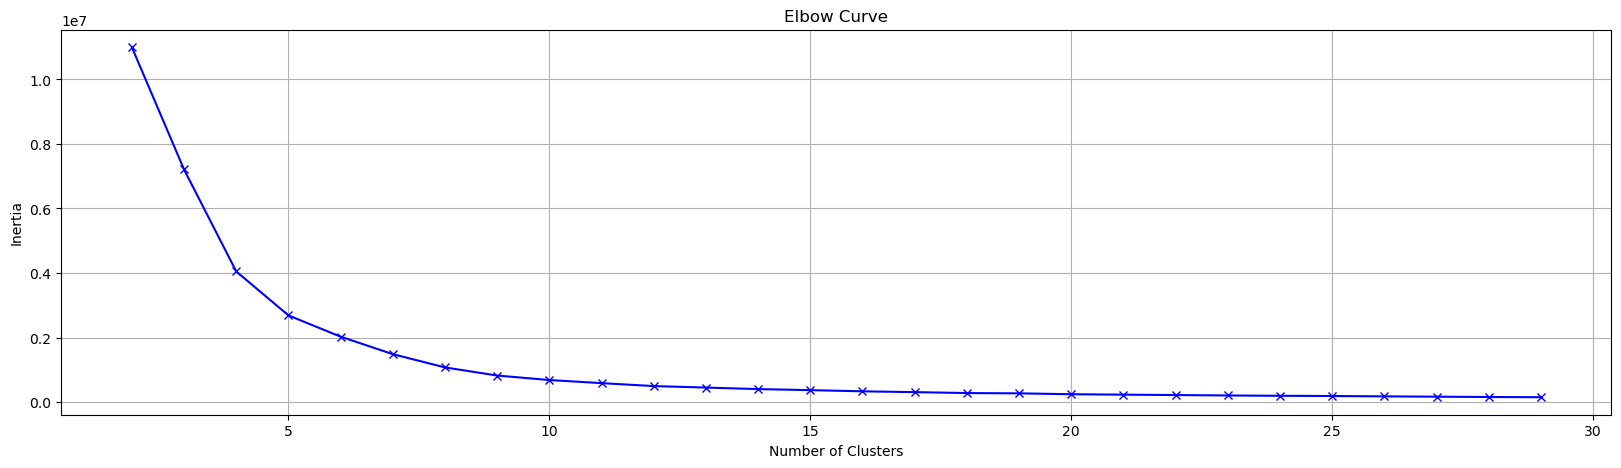

In [80]:
# Per determinare il n° dei cluster utilizzerò il metodo del gomito 

W = data
inertias = []
    
for k in range(2, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(W)
    inertias.append(kmeans.inertia_)
    
# Metodo Elbow Plot : è un grafico che ci  mostra sostanzialmente che all'aumentare dei cluster l'inerzia o distorsione diminuisce

plt.figure(figsize=(20,5))
plt.plot(range(2, 30), inertias, 'bx-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Si nota dal grafico che il valore migliore sembra essere tra 7 e 5, questa indecisione è data dal fatto che per essere più preciso servivano molti più dati

In [81]:
kmeans = KMeans(n_clusters = 7)
# Opto per 7 perchè mi sembra più realistco di 5 in questo dataset

In [82]:
kmeans.fit(df[['price','points']])
# Ora che ho il valore k che mi interessa, lo applico ai dati 

C:\Users\mirko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [83]:
df['kmeans_7'] = kmeans.labels_
# Infine creo una colonna nel dataframe che indicherà il ragruppamento dato dal kmeans a cui appartiene ogni singolo vino vino 

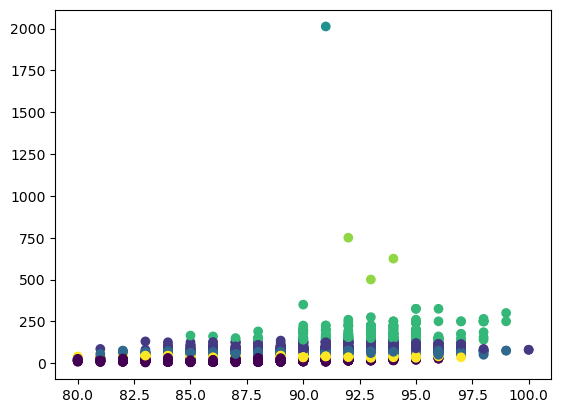

In [88]:
plt.scatter(x = df['points'], y = df['price'], c = df['kmeans_7'])
plt.show()
# Si può notare che il raggruppamento per il sistema di raccomandazione è stato fatto in base a prezzo,
# inquesto modo potranno essere prese decisioni scegliendo i vini migliori in una fascia di prezzo specifica ed evitando errori di valutazione

In [89]:
# Concludo dicendo che : grazie a queste analisi basate su valutazioni mirate si potrà decidere su quali prodotti puntare,
# tuttavia le tendenze e le stagionalità avranno un ruolo altrettanto cruciale sulla scelte che verranno prese.